In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


# Assigment 2-3 Optional Dataset - Automobile
## Part 0
### Goal 
My goal is to predict the cars price using the open source Auto data set from the UCI machine learning repository. In this data set, we have prices for 205 automobiles.
### Data set informations
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 
### Data Loading
In this part, firstly I have loaded the data from file 'car.data'.
 
Attributes:

1.symboling: -3, -2, -1, 0, 1, 2, 3.

2.normalized-losses: continuous from 65 to 256.

3.make:
alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

4.fuel-type: diesel, gas.

5.aspiration: std, turbo.

6.num-of-doors: four, two.

7.body-style: hardtop, wagon, sedan, hatchback, convertible.

8.drive-wheels: 4wd, fwd, rwd.

9.engine-location: front, rear.

10.wheel-base: continuous from 86.6 120.9.

11.length: continuous from 141.1 to 208.1.

12.width: continuous from 60.3 to 72.3.

13.height: continuous from 47.8 to 59.8.

14.curb-weight: continuous from 1488 to 4066.

15.engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

16.num-of-cylinders: eight, five, four, six, three, twelve, two.

17.engine-size: continuous from 61 to 326.

18.fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

19.bore: continuous from 2.54 to 3.94.

20.stroke: continuous from 2.07 to 4.17.

21.compression-ratio: continuous from 7 to 23.

22.horsepower: continuous from 48 to 288.

23.peak-rpm: continuous from 4150 to 6600.

24.city-mpg: continuous from 13 to 49.

25.highway-mpg: continuous from 16 to 54.

26.price: continuous from 5118 to 45400.


In [2]:
# Importing Dataset 
data = pd.read_csv("car.data",header=None,names=["symboling","normalized_losses","make","fuel_type","aspiration", "num_of_doors","body_style",
         "drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type",
         "num_of_cylinders", "engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
         "peak_rpm","city_mpg","highway_mpg","price"],na_values='?')

data.head()

# .head() function as default is loading 5 records. 
# If we want to load more or less items, we must enter the appropriate number in parentheses.

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
# features
data.columns

# columns attribute to return the column labels of the given Dataframe.

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [4]:
# I check which columns have empty values
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [5]:
# I replace them withh 'four', since 'four' doors is the most frequent value in this column as shown below, it is the most likely value to occur
data["num_of_doors"].mode()[0]
#replace the missing values by the most frequent value
data["num_of_doors"].fillna(data["num_of_doors"].mode()[0], inplace=True)

In [6]:
#Replace the missing values by mean value of respective columns
data["normalized_losses"].fillna(data["normalized_losses"].astype("float").mean(), inplace=True)

data["bore"].fillna(data["bore"].astype("float").mean(), inplace=True)

data["stroke"].fillna(data["stroke"].astype("float").mean(), inplace = True)

data["peak_rpm"].fillna(data["peak_rpm"].astype("float").mean(), inplace = True)

data['horsepower'].fillna(data['horsepower'].astype("float").mean(), inplace=True)

In [7]:
#Drop entire row "price" column is missing
data.dropna(subset=["price"], axis=0, inplace=True)
# reset index as we dropped row
data.reset_index(drop=True, inplace=True)
# re-checking missing after handling them
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [8]:
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [9]:
# Numerical variables should have type 'float' or 'int' whereas variables with strings should have type 'object'.
# So, we convert below columns to proper data types
data[["bore", "stroke","price","peak_rpm"]] = data[["bore", "stroke","price","peak_rpm"]].astype("float")
data[["normalized_losses","horsepower"]] = data[["normalized_losses","horsepower"]].astype("int")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [10]:
# Numerical data
data_numerical = data[["symboling","normalized_losses","wheel_base", "length","width",
          "height","curb_weight", "engine_size","horsepower","bore","stroke","compression_ratio",
         "peak_rpm","city_mpg","highway_mpg","price"]]

# Categorical data
data_categorical = ["make","fuel-type","aspiration","num-of-doors","body-style",
         "drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system"]

In [11]:
# function, which standardize the feature matrix and returns it together with two vectors containing original 
# features' means and standard deviations.

def standardize(X):
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  return np.array([np.array(np.divide(np.subtract(x, mean), std)) for x in X]), mean, std

# function, which restores the original data given standardized feature matrix X and vectors containing original 
# features' means and standard deviations.

def destandardize(X, mean, std):
  return np.array([np.add(np.multiply(x, std), mean) for x in X])

def predict(b, X):
    return X.dot(b)

def cost(y_pred, y_true):
    n = len(y_true)
    return (sum((abs(y_pred - y_true)**2))/n)[0]

# Part 1
### Engine size & price

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. 
Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.
We can examine the correlation between engine-size and price and see it's approximately 0.87


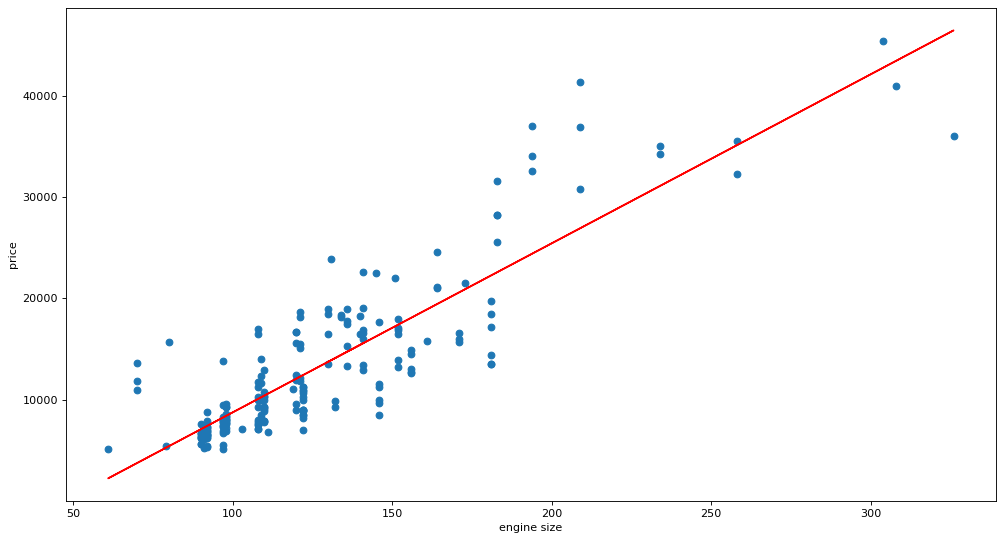

-7963.338906281049
[166.86001569]
0.7609686443622008


,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


In [12]:
# Creating and training a simple regression model of engine size and price
X = data.engine_size.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X,y)

# .fit() is calculating the optimal values of the weights b0 and b1, using the existing input and output, 
# x and y, as the arguments. In other words, .fit() fits the model. 

pr = model.predict(X)
plt.figure(figsize=(15,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'red')
plt.xlabel('engine size')
plt.ylabel('price')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))

# The estimated regression function, represented by the red line, has the equation f(x) = b0 + b1 * x. 
# The attributes of model are .intercept_, which represents the coefficient b0, and .coef_, which represents b1.
# .score() - the arguments are the predictor x and response y, and the return value is R^2.

data[["engine_size", "price"]].corr()

# corr() is used to find the pairwise correlation of columns in the Pandas Dataframe in Python, excluding NA/null values.

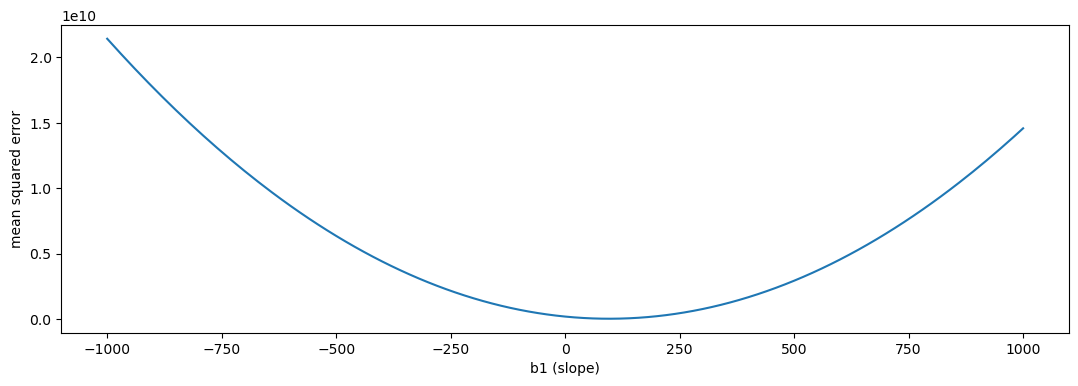

In [13]:
# Data preparation
mse = {}
bs = np.linspace(-1000, 1000, len(X))
for b in bs:
  mse[b] = cost(predict(b, X), y)
X_linspace = np.linspace(0, 6000)
best_b1 = min(mse, key=mse.get)

# Plot size
plt.figure(figsize=(13, 4))

# First Plot
plt.subplot(1, 1, 1)
plt.plot(*zip(*sorted(mse.items())))
plt.xlabel('b1 (slope)')
plt.ylabel('mean squared error');

# Cost function has local minimum (mean squared error is the smallest), when slope value is around 20.

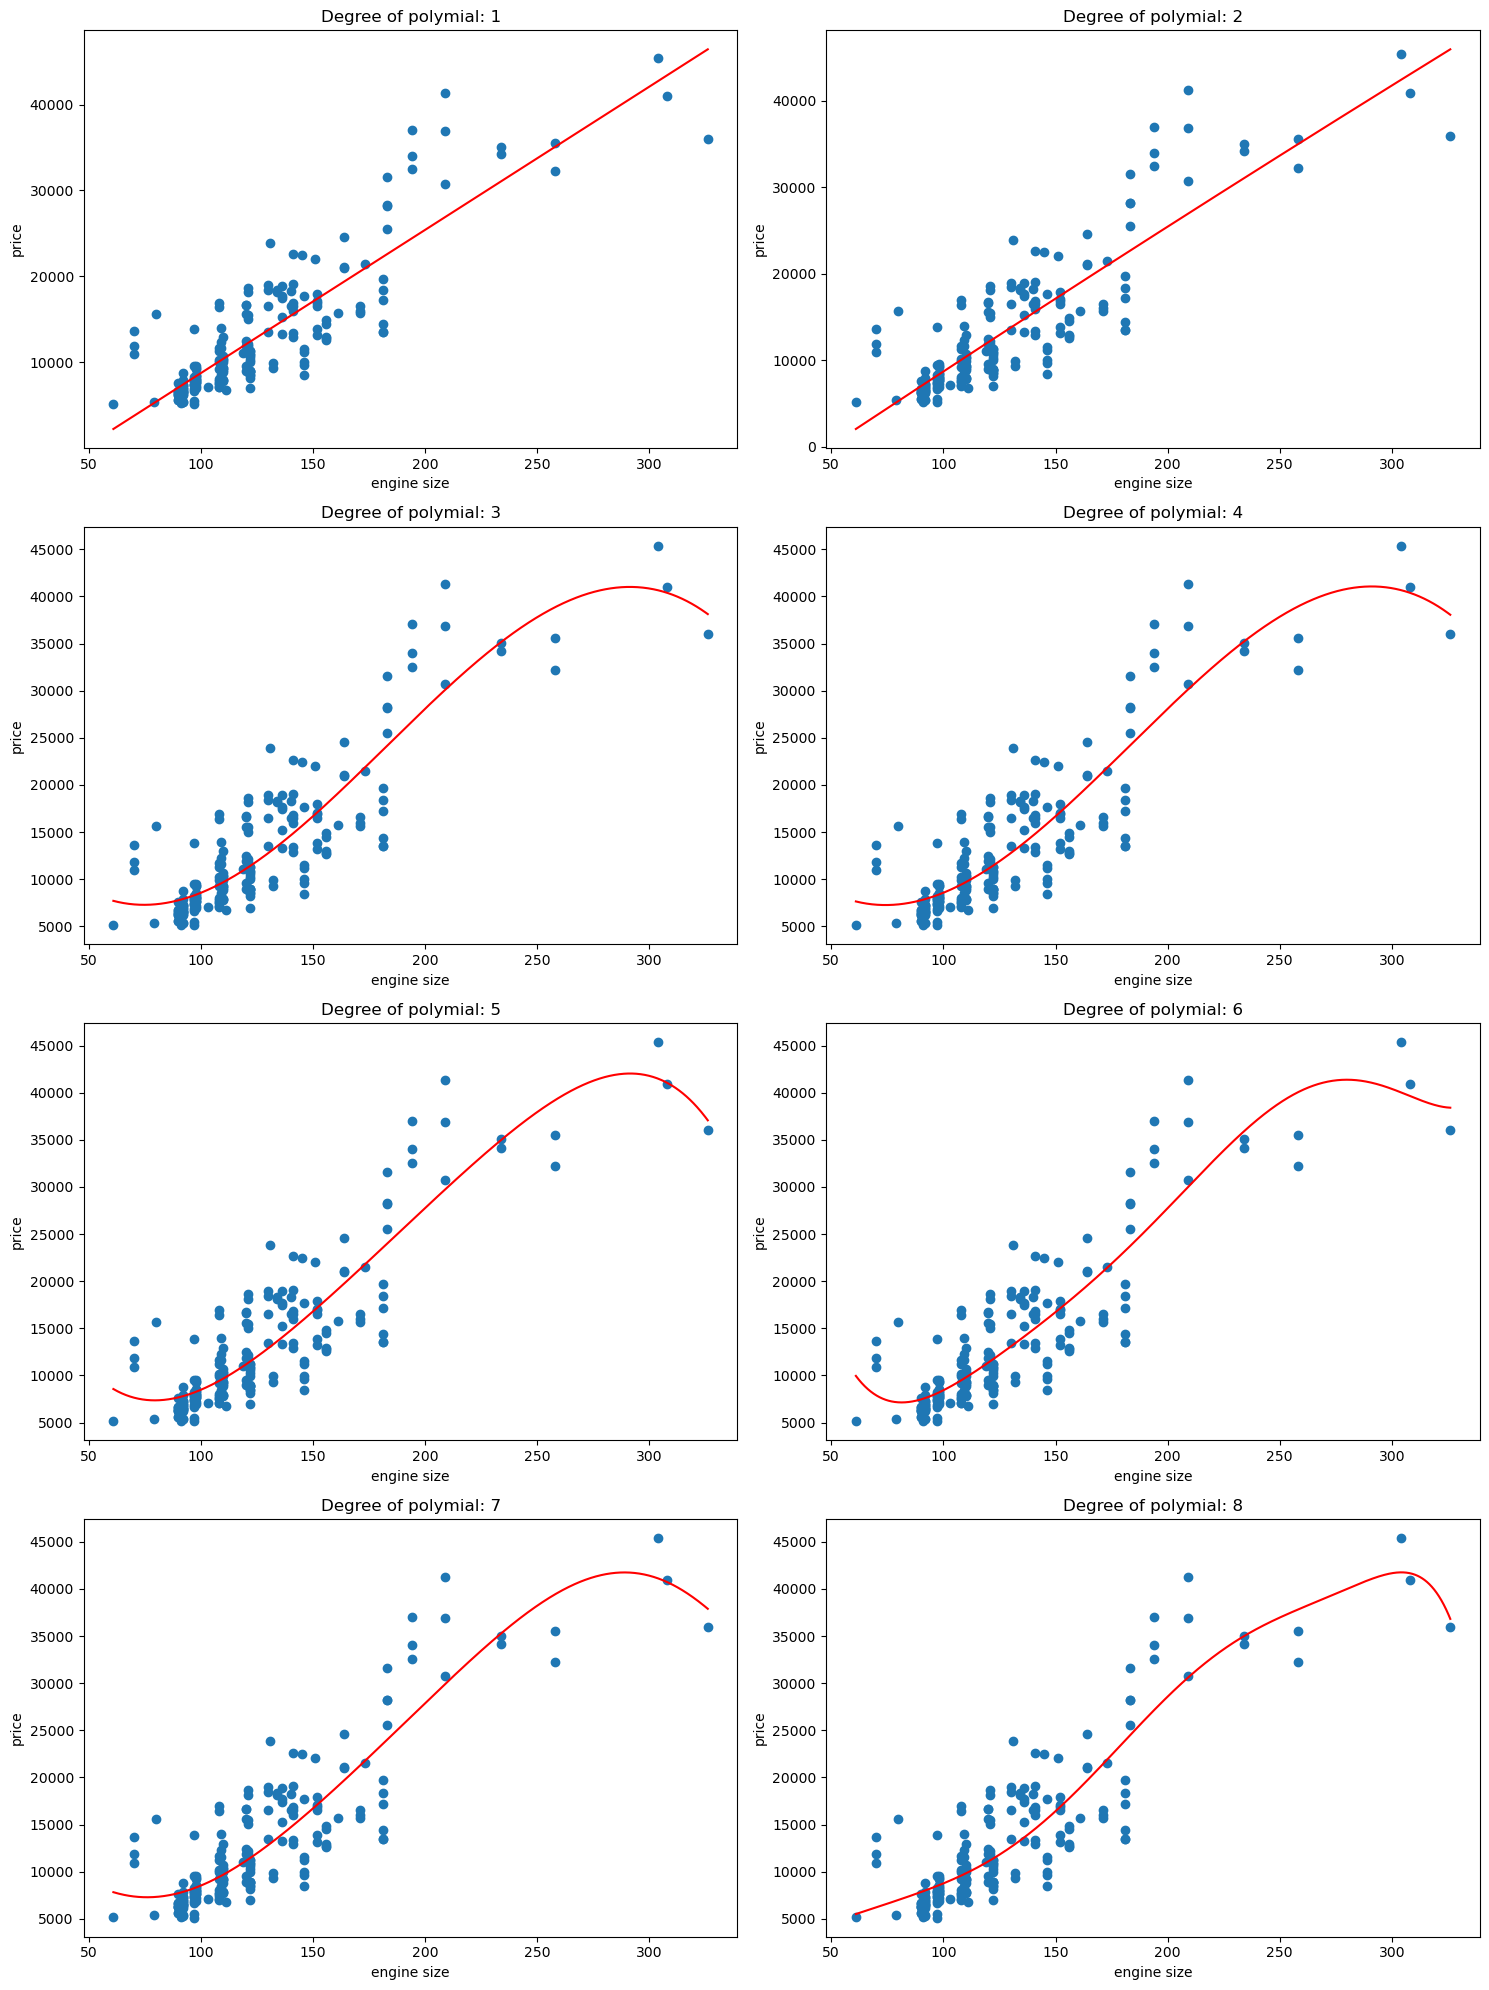

In [14]:
# Creating and ploting higher order polynomial regression models.

# Now I am creating and ploting higher order polynomial regression models from degree 1 to 8.
# As You can see below I decided to use sklearn.pipeline.

# Definition of pipeline class according to scikit-learn is:
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of pipeline must implement fit and transform methods and the final estimator 
# only needs to implement fit.

plt.figure(figsize=(15,20))

errors = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)
    
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    errors.append(mean_squared_error(y, y_pr))

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    plt.xlabel('engine size')
    plt.ylabel('price')
    plt.title("Degree of polymial: {}".format(order))
    
plt.tight_layout()
plt.show()

# As you can easily see in the graphs below, each increase in degree results in better and better 
# description of the data.

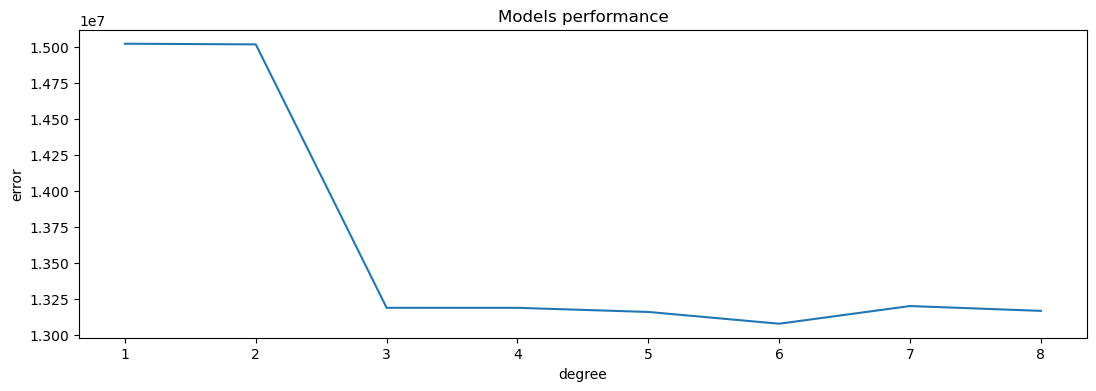

In [15]:
# Graph of the error depending on the degree.
plt.figure(figsize=(13, 4))
plt.plot([1,2,3,4,5,6,7,8], errors)
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

# As can be seen, the error decreases with increasing degree. Initially, the decrease is much greater. 
# From degree 3, the error decreases very slowly. 
# Between step 1 and 2 we have a very similar error. 
# This is because a degree 2 polynomial looks almost like a diagonal.

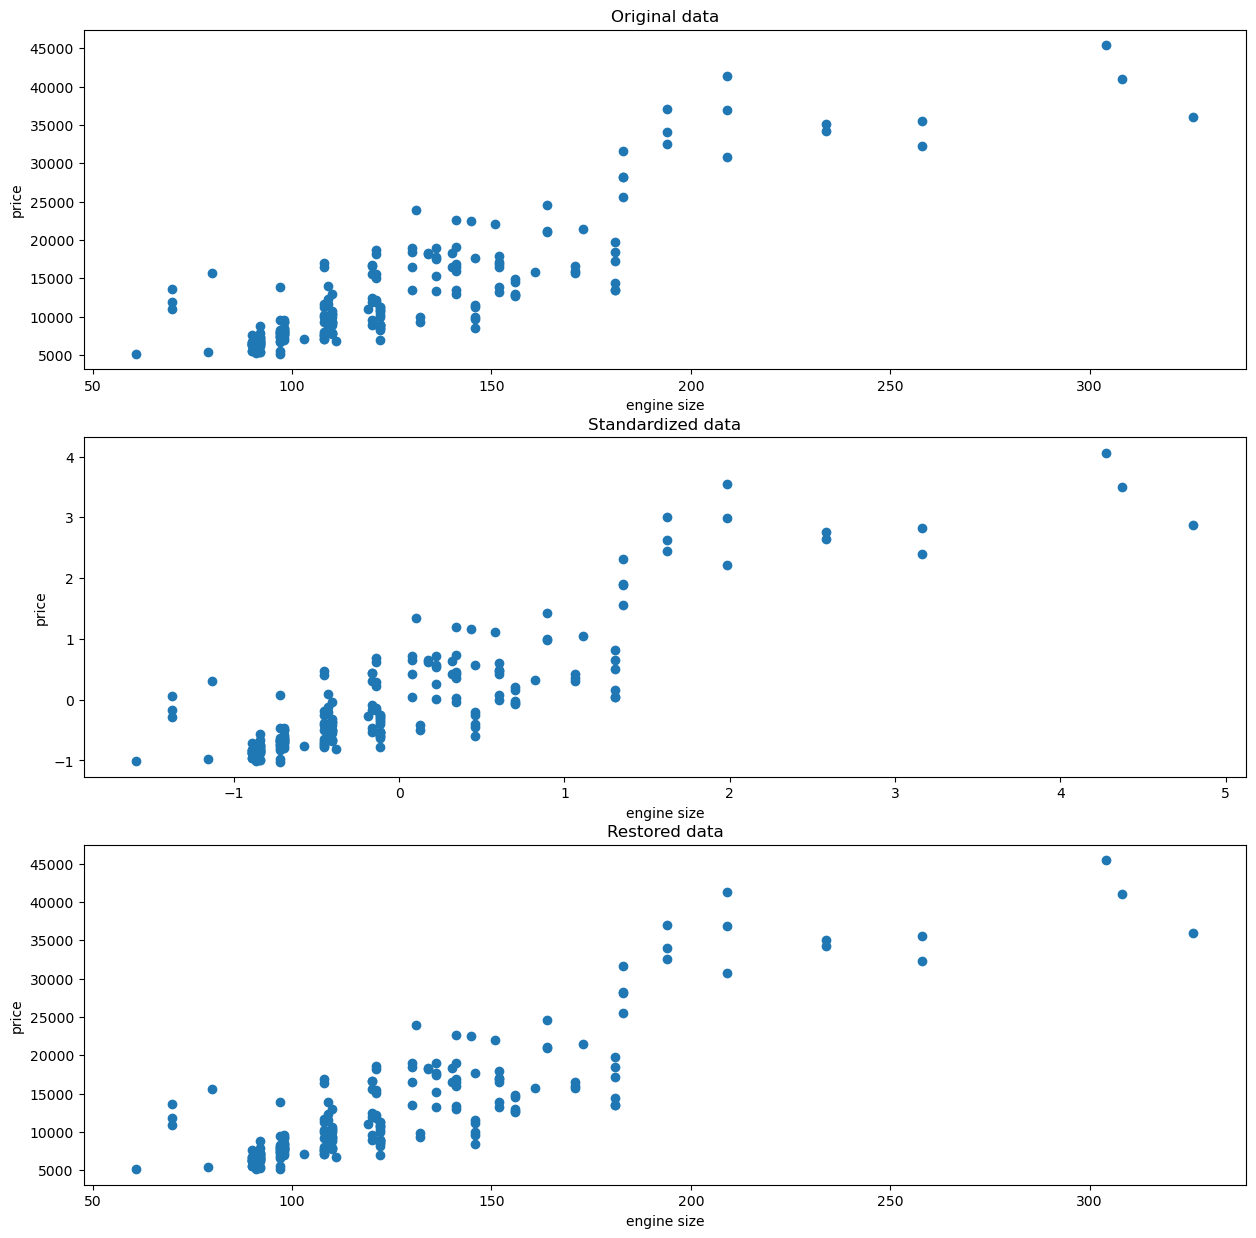

In [16]:
X = data.engine_size.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1,1)[:1000]

# Plot size
plt.figure(figsize=(15,15))

# Original Data X, y
plt.subplot(3, 1, 1)
plt.title("Original data")
plt.xlabel("engine size")
plt.ylabel("price")
plt.scatter(X, y)

# Data after standarization 
plt.subplot(3, 1, 2)
plt.title("Standardized data")
plt.xlabel("engine size")
plt.ylabel("price")
standarized_X, mean_x, standard_deviation_x = standardize(X.tolist())
standarized_y, mean_y, standard_deviation_y = standardize(y.tolist())
plt.scatter(standarized_X, standarized_y)

# Data after destandarization
plt.subplot(3, 1, 3)
plt.title("Restored data")
plt.xlabel("engine size")
plt.ylabel("price")
destandarized_X = destandardize(standarized_X, mean_x, standard_deviation_x)
destandarized_y = destandardize(standarized_y, mean_y, standard_deviation_y)
plt.scatter(destandarized_X, destandarized_y);

# Data standardization is the process of converting data to a common format to enable users to process and analyze it.

# As we can see in the middle plot, data has been standardized, so the values on the axes are are easier to read and interpret.
# After the destandardization, the graph's axes looks identical to the one containing the original data (first and third chart).

# Part 2
### Highway mpg & price

Highway mpg is a potential predictor variable of price Highway MPG: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed. City MPG: the score a car will get on average in city conditions, with stopping and starting at lower speeds.

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.We can examine the correlation between highway-mpg and price and see it's approximately -0.704

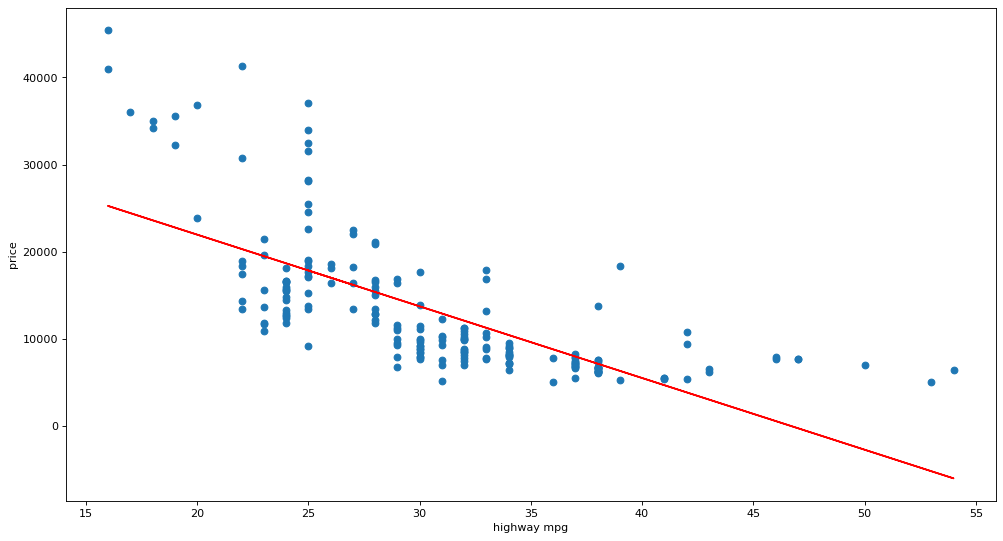

38423.305858157386
[-821.73337832]
0.4965911884339175


,highway_mpg,price
highway_mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [17]:
# Creating and training a simple regression model of highway mpg and price
X = data.highway_mpg.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X,y)

# .fit() is calculating the optimal values of the weights b0 and b1, using the existing input and output, 
# x and y, as the arguments. In other words, .fit() fits the model. 

pr = model.predict(X)
plt.figure(figsize=(15,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'red')
plt.xlabel('highway mpg')
plt.ylabel('price')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))

# The estimated regression function, represented by the red line, has the equation f(x) = b0 + b1 * x. 
# The attributes of model are .intercept_, which represents the coefficient b0, and .coef_, which represents b1.
# .score() - the arguments are the predictor x and response y, and the return value is R^2.

data[["highway_mpg", "price"]].corr()

# corr() is used to find the pairwise correlation of columns in the Pandas Dataframe in Python, excluding NA/null values.

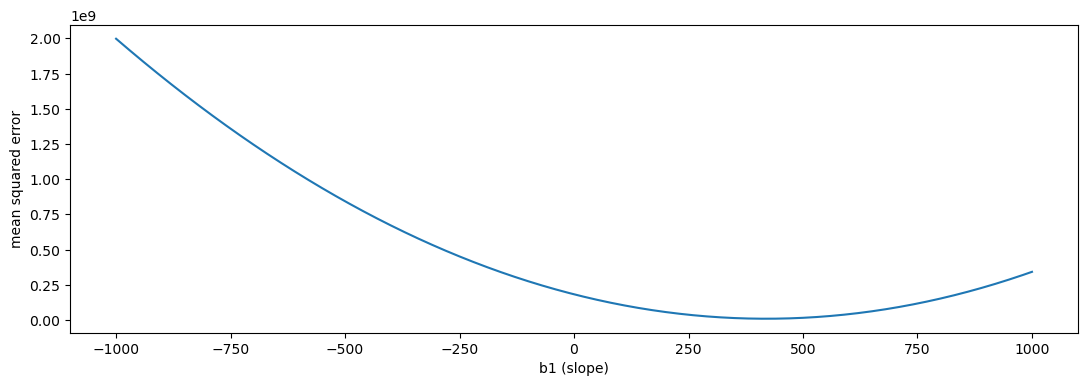

In [18]:
# Data preparation
mse = {}
bs = np.linspace(-1000, 1000, len(X))
for b in bs:
  mse[b] = cost(predict(b, X), y)
X_linspace = np.linspace(0, 6000)
best_b1 = min(mse, key=mse.get)

# Plot size
plt.figure(figsize=(13, 4))

# First Plot
plt.subplot(1, 1, 1)
plt.plot(*zip(*sorted(mse.items())))
plt.xlabel('b1 (slope)')
plt.ylabel('mean squared error');

# Cost function has local minimum (mean squared error is the smallest), when slope value is around 400.

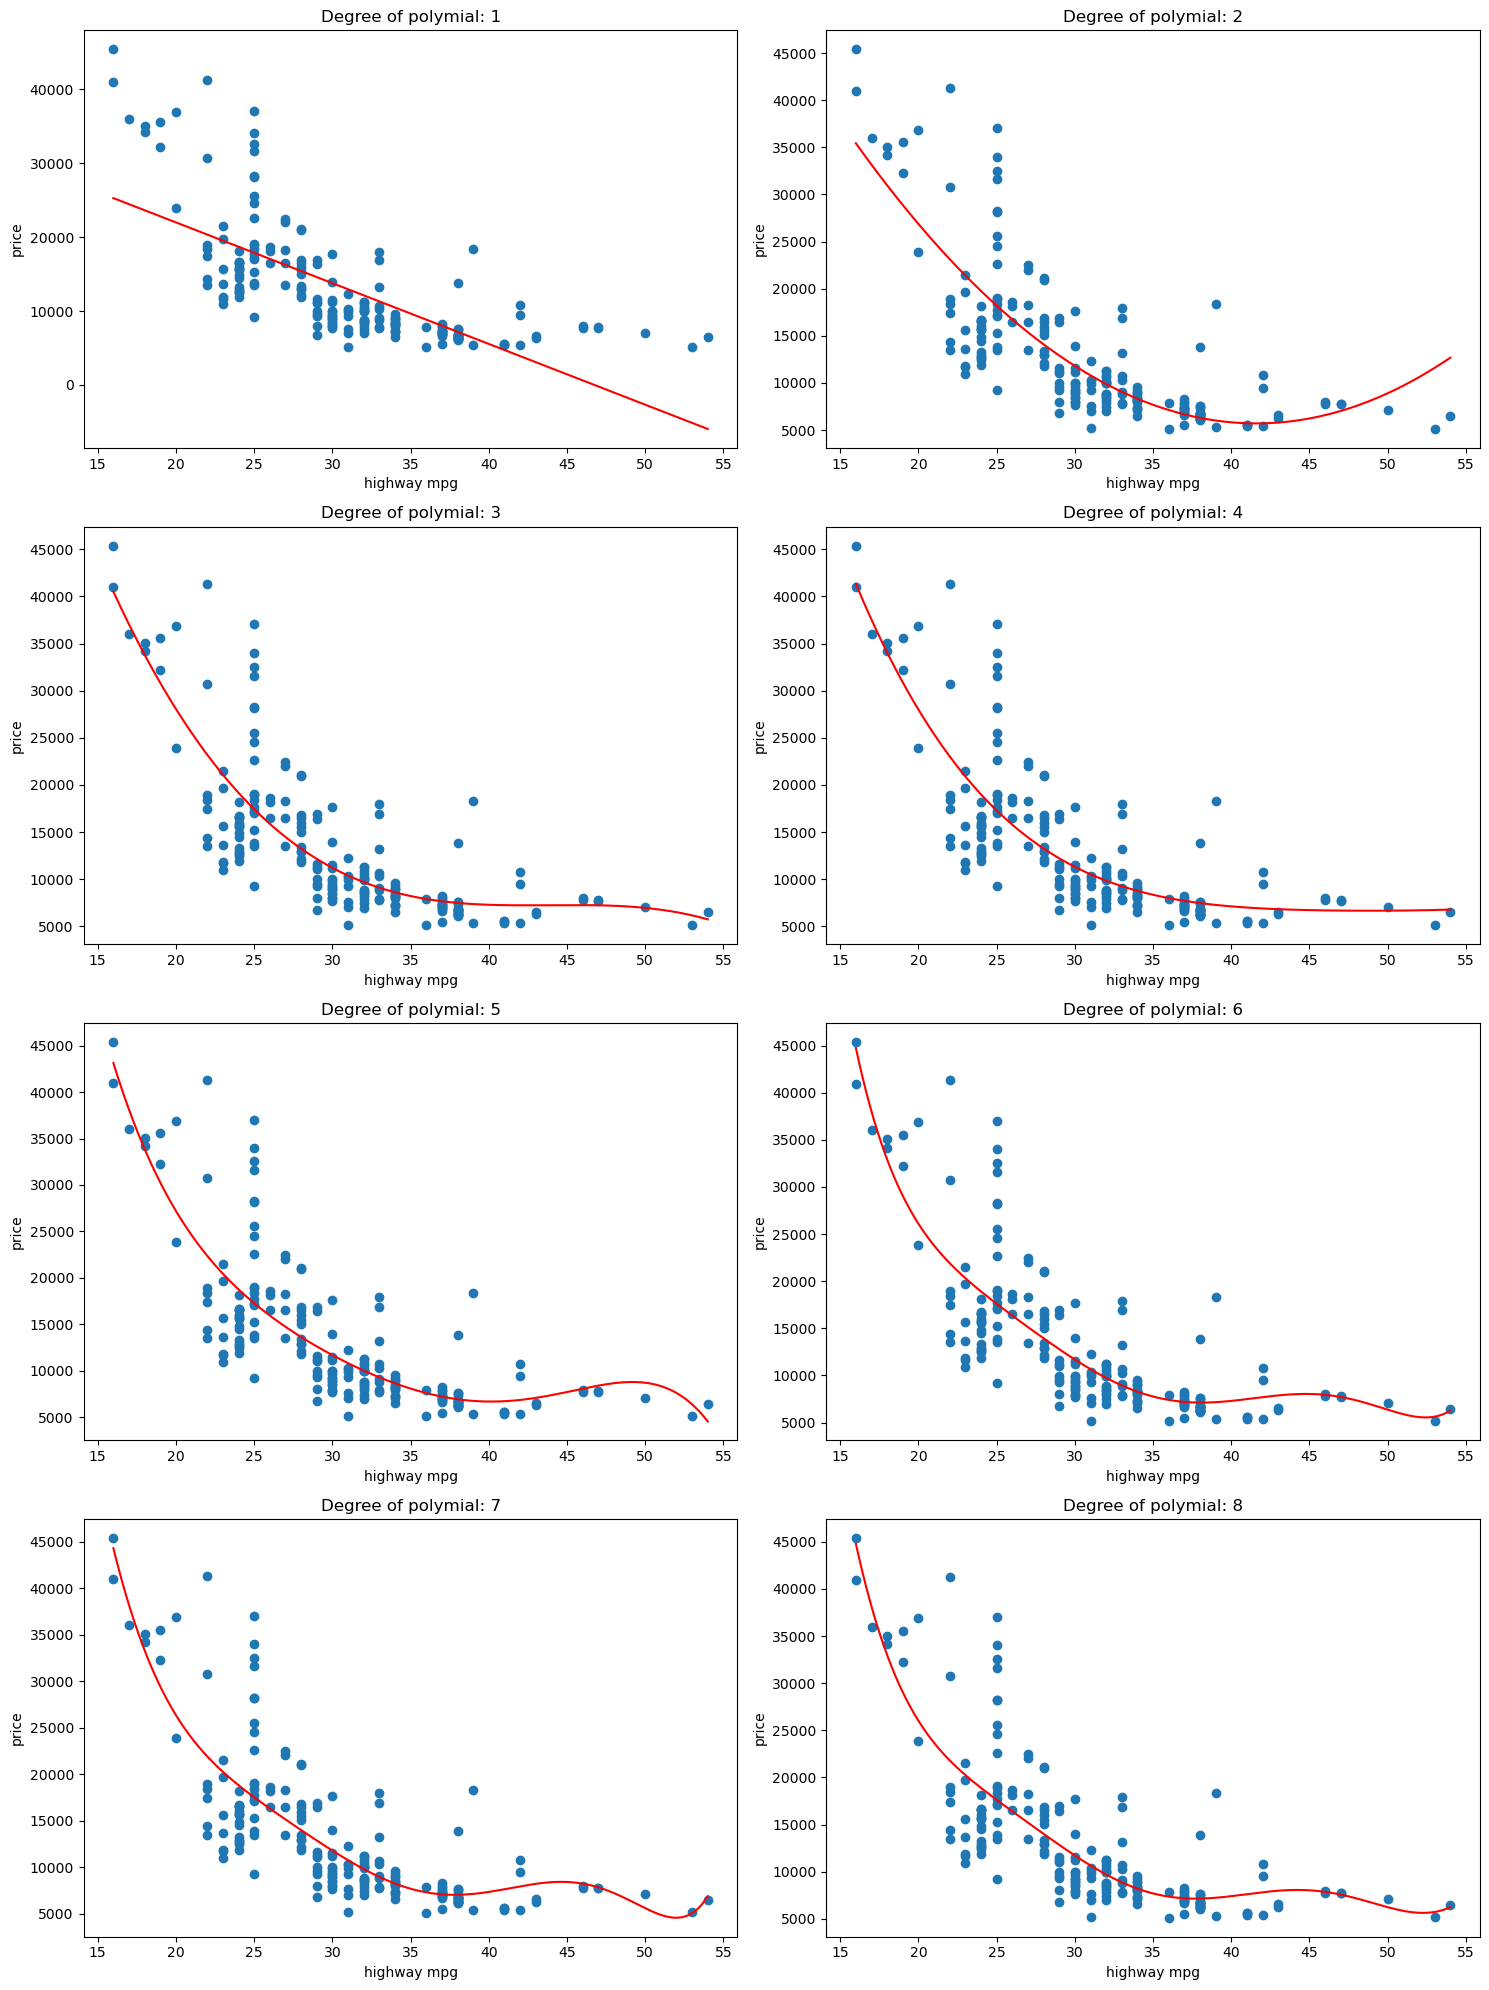

In [19]:
# Creating and ploting higher order polynomial regression models.

# Now I am creating and ploting higher order polynomial regression models from degree 1 to 8.
# As You can see below I decided to use sklearn.pipeline.

# Definition of pipeline class according to scikit-learn is:
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of pipeline must implement fit and transform methods and the final estimator 
# only needs to implement fit.

plt.figure(figsize=(15,20))

errors = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)
    
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    errors.append(mean_squared_error(y, y_pr))

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    plt.xlabel('highway mpg')
    plt.ylabel('price')
    plt.title("Degree of polymial: {}".format(order))
    
plt.tight_layout()
plt.show()

# As you can easily see in the graphs below, each increase in degree results in better and better 
# description of the data.

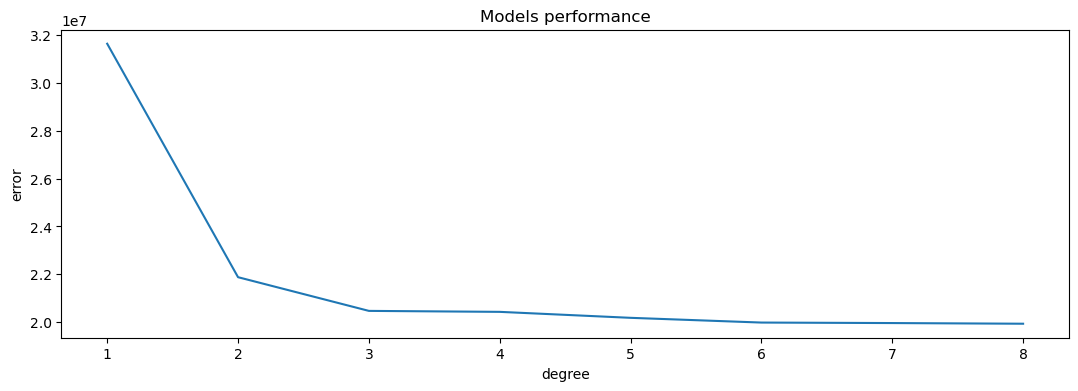

In [20]:
# Graph of the error depending on the degree.
plt.figure(figsize=(13, 4))
plt.plot([1,2,3,4,5,6,7,8], errors)
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

# As can be seen, the error decreases with increasing degree. Initially, the decrease is much greater. 
# From degree 3, the error decreases very slowly. Interestingly, the graph looks almost the same as the one in Part 1.

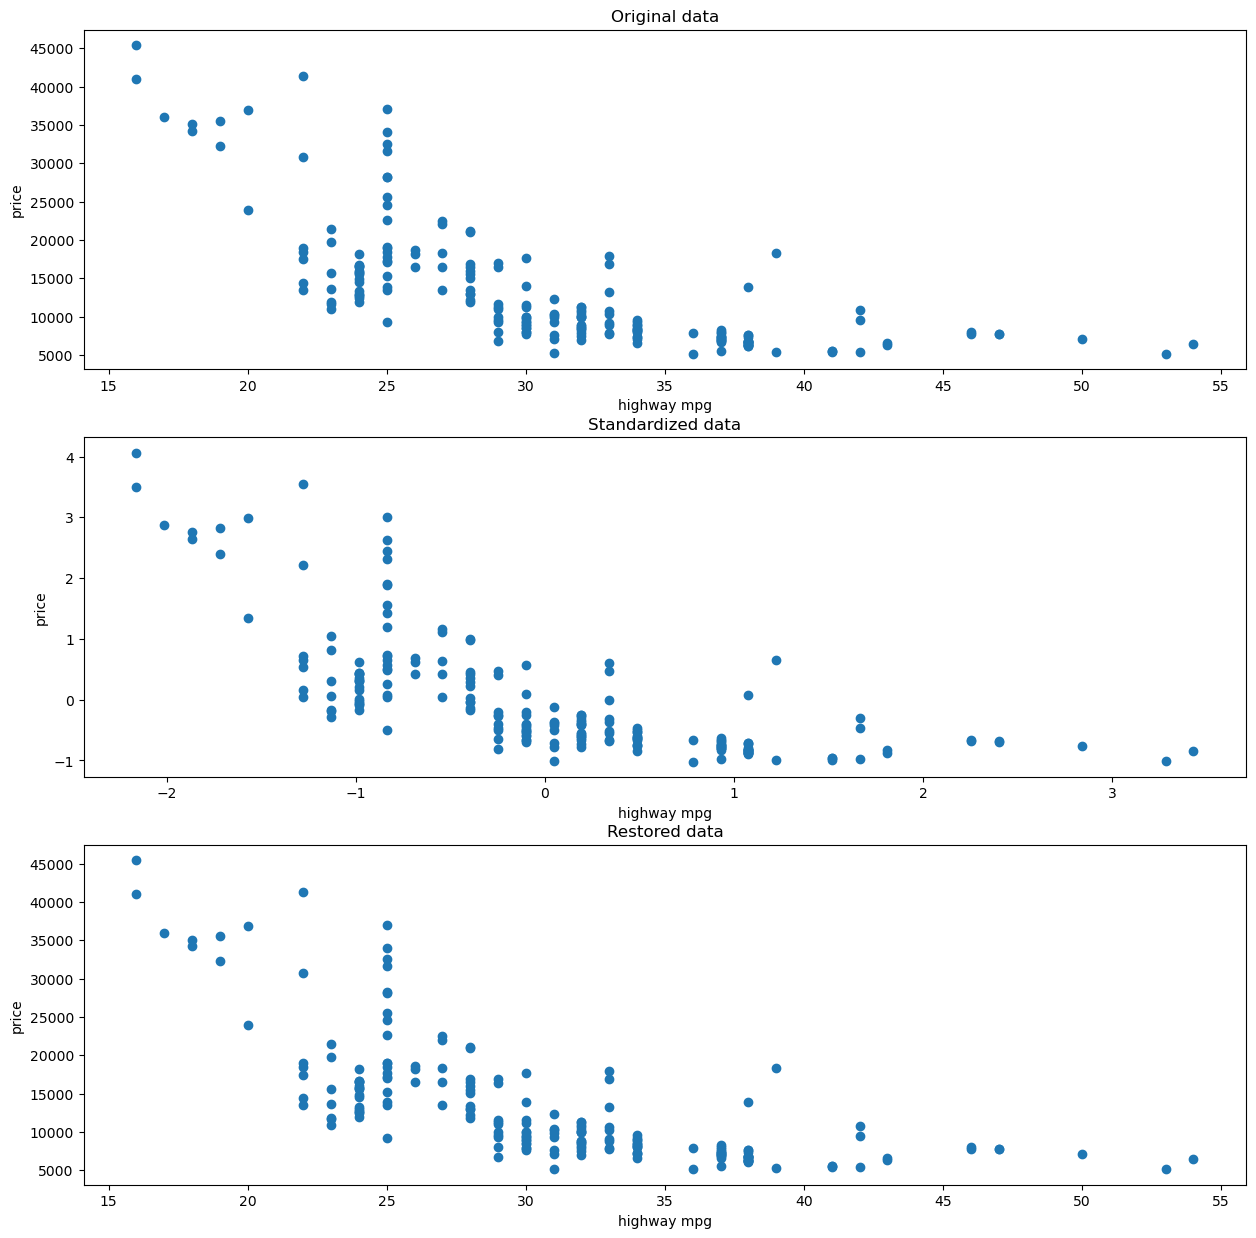

In [21]:
X = data.highway_mpg.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1,1)[:1000]

# Plot size
plt.figure(figsize=(15,15))

# Original Data X, y
plt.subplot(3, 1, 1)
plt.title("Original data")
plt.xlabel("highway mpg")
plt.ylabel("price")
plt.scatter(X, y)

# Data after standarization 
plt.subplot(3, 1, 2)
plt.title("Standardized data")
plt.xlabel("highway mpg")
plt.ylabel("price")
standarized_X, mean_x, standard_deviation_x = standardize(X.tolist())
standarized_y, mean_y, standard_deviation_y = standardize(y.tolist())
plt.scatter(standarized_X, standarized_y)

# Data after destandarization
plt.subplot(3, 1, 3)
plt.title("Restored data")
plt.xlabel("highway mpg")
plt.ylabel("price")
destandarized_X = destandardize(standarized_X, mean_x, standard_deviation_x)
destandarized_y = destandardize(standarized_y, mean_y, standard_deviation_y)
plt.scatter(destandarized_X, destandarized_y);

# Data standardization is the process of converting data to a common format to enable users to process and analyze it.

# As we can see in the middle plot, data has been standardized, so the values on the axes are are easier to read and interpret.
# After the destandardization, the graph's axes looks identical to the one containing the original data (first and third chart).

# Part 3
### Peak rpm & price

RPM stands for revolutions per minute, and it’s used as a measure of how fast any machine is operating at a given time. In cars, rpm measures how many times the engine’s crankshaft makes one full rotation every minute, and along with it, how many times each piston goes up and down in its cylinder.

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.We can examine the correlation between peak-rp and price and see it's approximately -0.101616

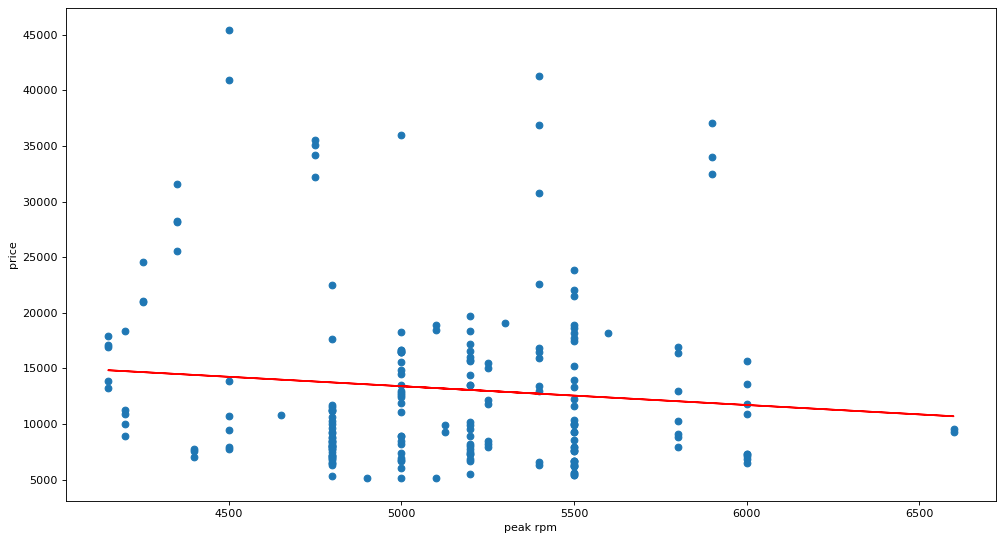

21851.014686139806
[-1.68902902]
0.010325785864205295


,peak_rpm,price
peak_rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [22]:
# Creating and training a simple regression model of peak rpm and price
X = data.peak_rpm.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X,y)

# .fit() is calculating the optimal values of the weights b0 and b1, using the existing input and output, 
# x and y, as the arguments. In other words, .fit() fits the model. 

pr = model.predict(X)
plt.figure(figsize=(15,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'red')
plt.xlabel('peak rpm')
plt.ylabel('price')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))

# The estimated regression function, represented by the red line, has the equation f(x) = b0 + b1 * x. 
# The attributes of model are .intercept_, which represents the coefficient b0, and .coef_, which represents b1.
# .score() - the arguments are the predictor x and response y, and the return value is R^2.

data[["peak_rpm", "price"]].corr()

# corr() is used to find the pairwise correlation of columns in the Pandas Dataframe in Python, excluding NA/null values.

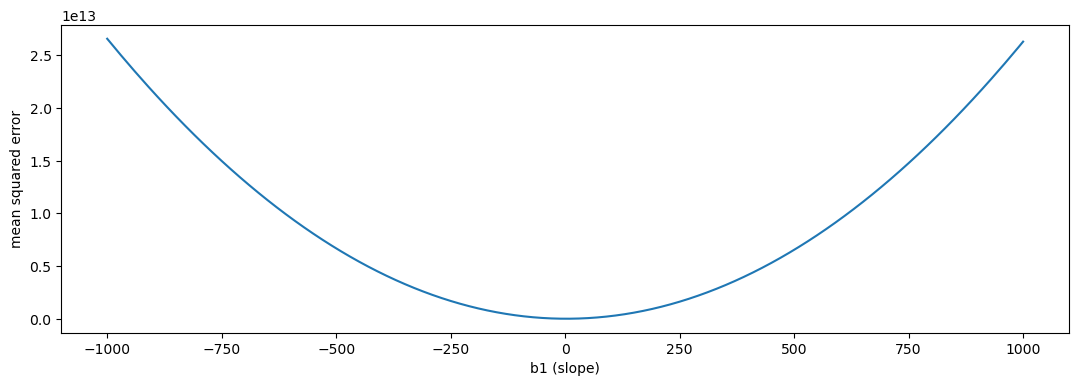

In [23]:
# Data preparation
mse = {}
bs = np.linspace(-1000, 1000, len(X))
for b in bs:
  mse[b] = cost(predict(b, X), y)
X_linspace = np.linspace(0, 6000)
best_b1 = min(mse, key=mse.get)

# Plot size
plt.figure(figsize=(13, 4))

# First Plot
plt.subplot(1, 1, 1)
plt.plot(*zip(*sorted(mse.items())))
plt.xlabel('b1 (slope)')
plt.ylabel('mean squared error');

# Cost function has local minimum (mean squared error is the smallest), when slope value is around 0.

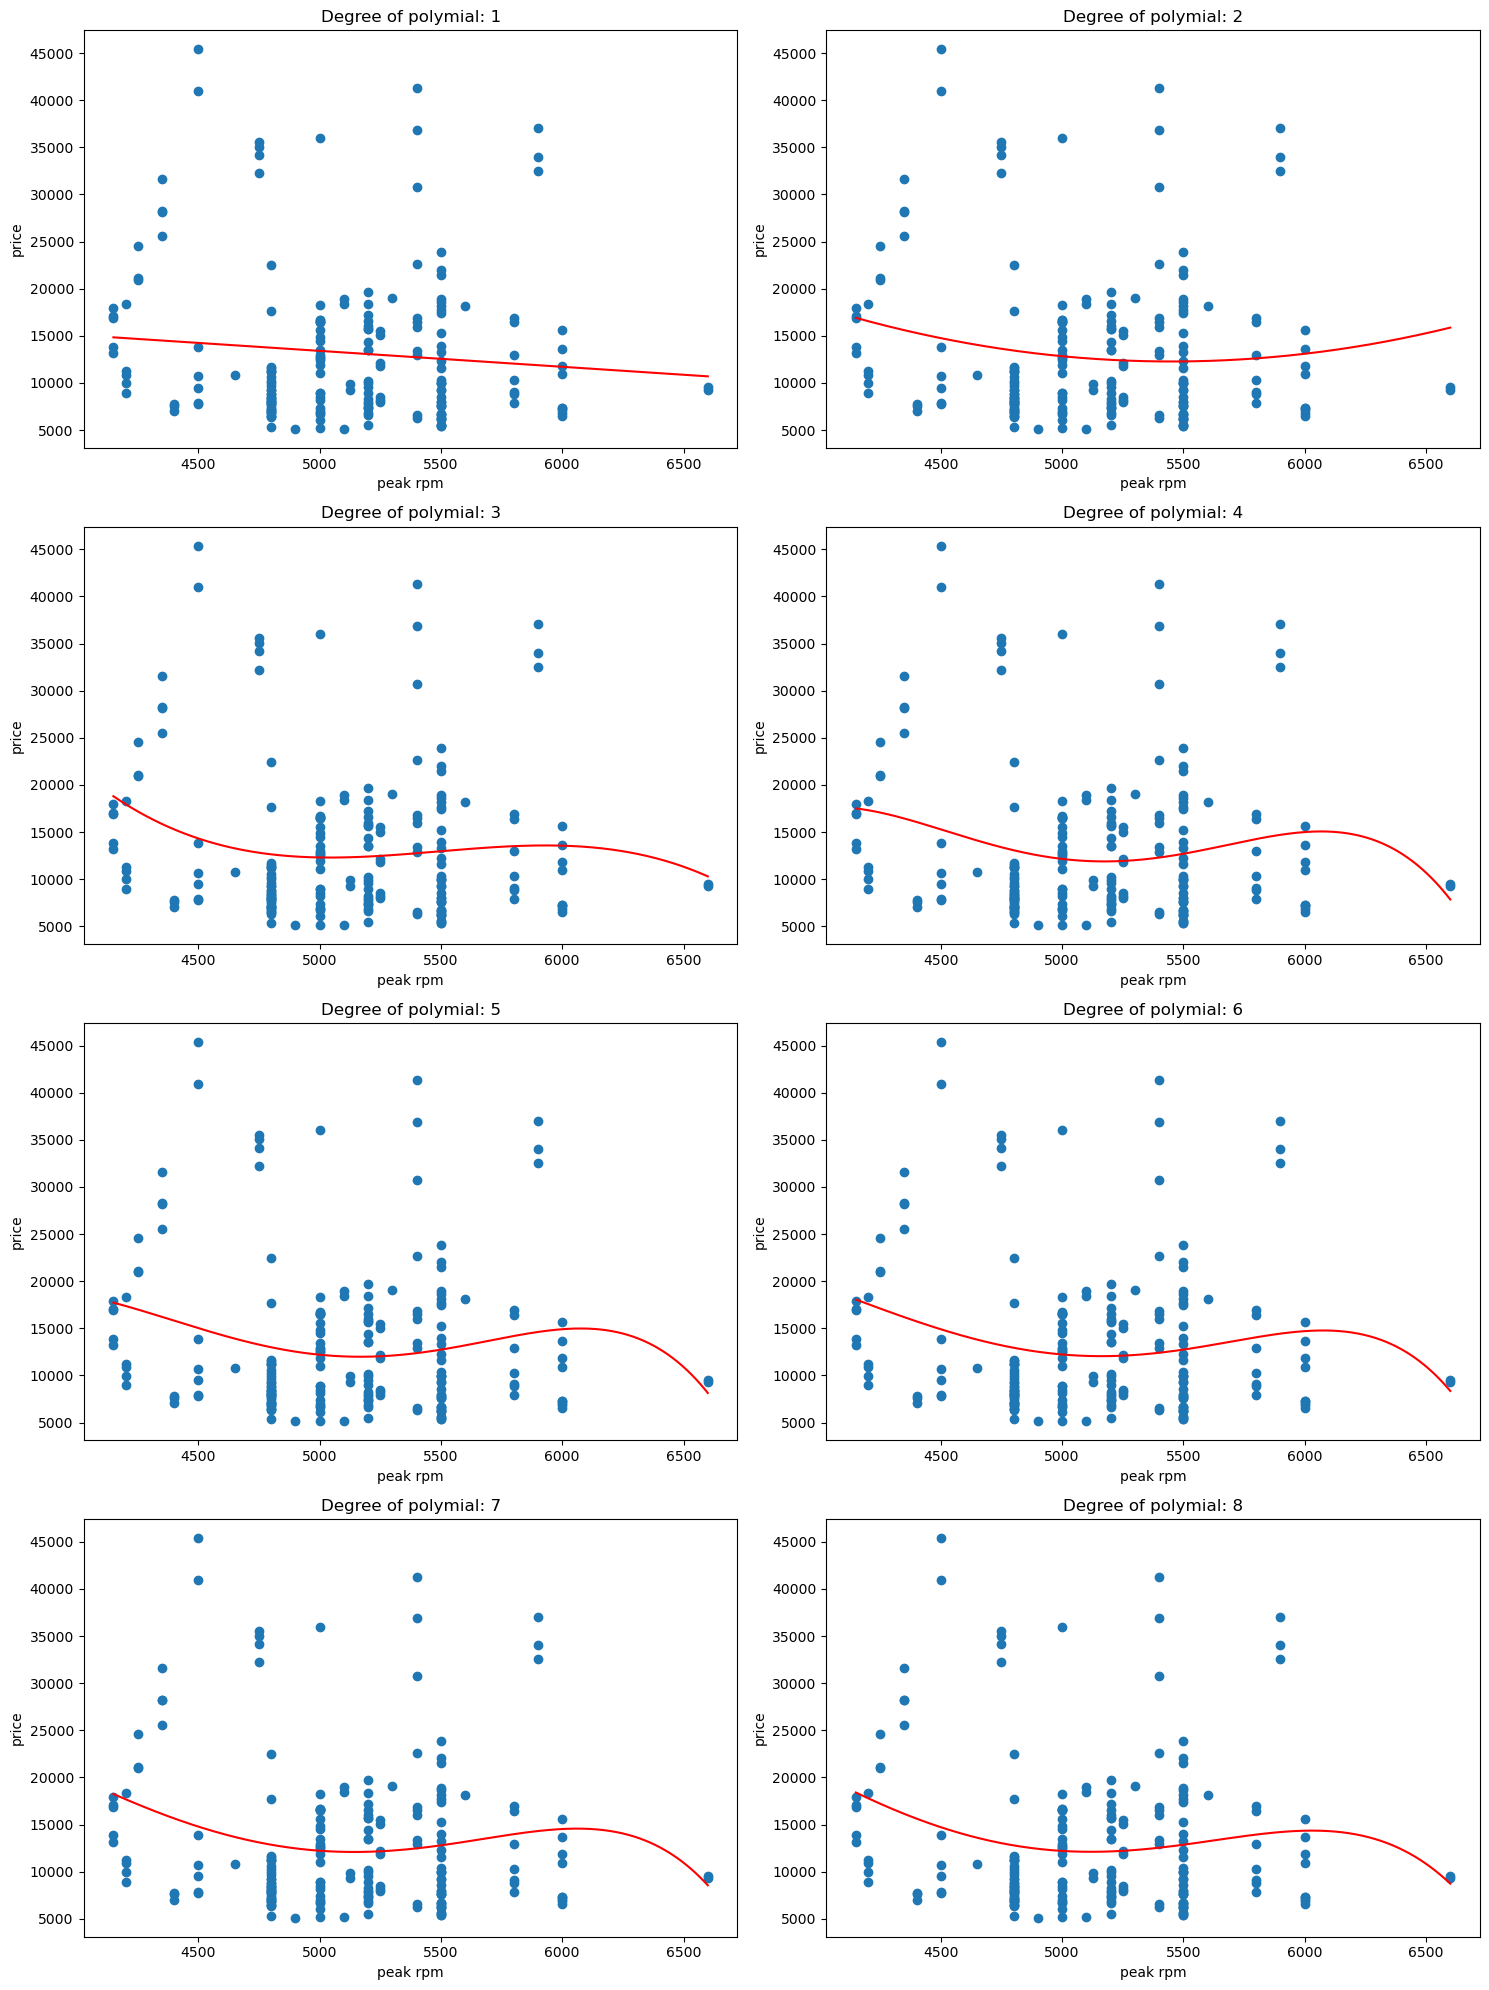

In [24]:
# Creating and ploting higher order polynomial regression models.

# Now I am creating and ploting higher order polynomial regression models from degree 1 to 8.
# As You can see below I decided to use sklearn.pipeline.

# Definition of pipeline class according to scikit-learn is:
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of pipeline must implement fit and transform methods and the final estimator 
# only needs to implement fit.

plt.figure(figsize=(15,20))

errors = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)
    
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    errors.append(mean_squared_error(y, y_pr))

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    plt.xlabel('peak rpm')
    plt.ylabel('price')
    plt.title("Degree of polymial: {}".format(order))
    
plt.tight_layout()
plt.show()

# The data presented in the chart below seem difficult to describe. 
# This has to do with the correlation coefficient, which is approx -0.101616.

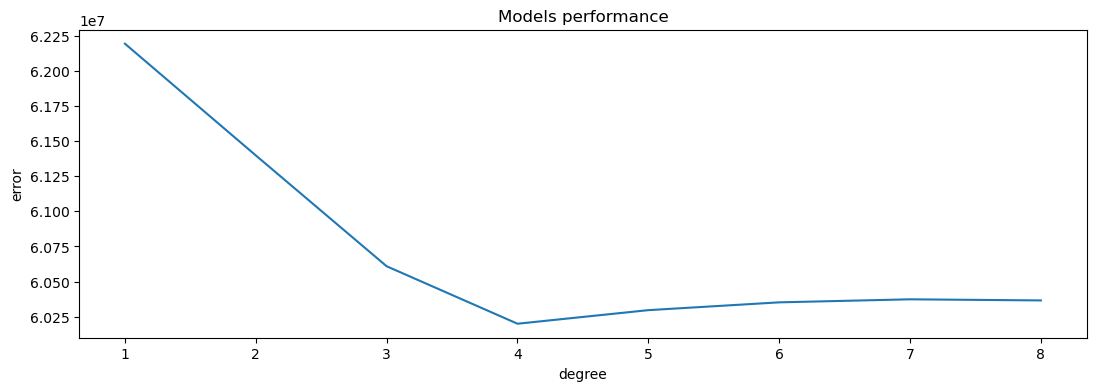

In [25]:
# Graph of the error depending on the degree.
plt.figure(figsize=(13, 4))
plt.plot([1,2,3,4,5,6,7,8], errors)
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

# As can be seen, the error initially decreases with increasing degree. 
# From degree 3, it rises again. This graph showing the error is no surprise to me. 
# This can be seen even in the above eight charts. 
#Increasing the degree does not lead to better data prediction at all.

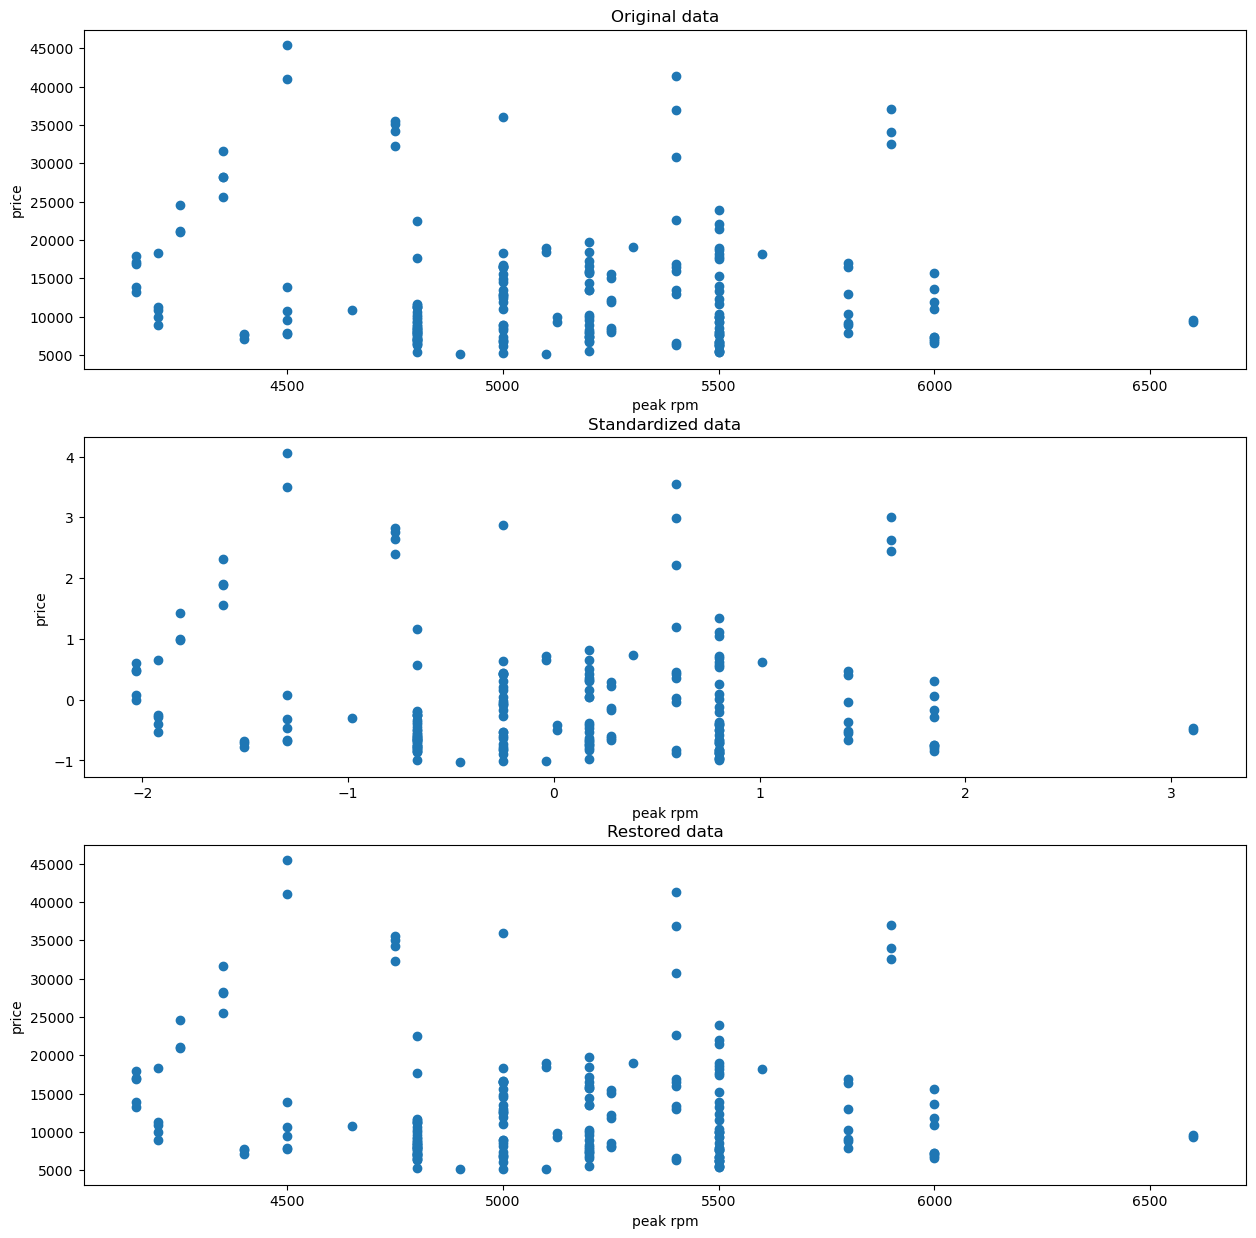

In [26]:
X = data.peak_rpm.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1,1)[:1000]

# Plot size
plt.figure(figsize=(15,15))

# Original Data X, y
plt.subplot(3, 1, 1)
plt.title("Original data")
plt.xlabel("peak rpm")
plt.ylabel("price")
plt.scatter(X, y)

# Data after standarization 
plt.subplot(3, 1, 2)
plt.title("Standardized data")
plt.xlabel("peak rpm")
plt.ylabel("price")
standarized_X, mean_x, standard_deviation_x = standardize(X.tolist())
standarized_y, mean_y, standard_deviation_y = standardize(y.tolist())
plt.scatter(standarized_X, standarized_y)

# Data after destandarization
plt.subplot(3, 1, 3)
plt.title("Restored data")
plt.xlabel("peak rpm")
plt.ylabel("price")
destandarized_X = destandardize(standarized_X, mean_x, standard_deviation_x)
destandarized_y = destandardize(standarized_y, mean_y, standard_deviation_y)
plt.scatter(destandarized_X, destandarized_y);

# Data standardization is the process of converting data to a common format to enable users to process and analyze it.

# As we can see in the middle plot, data has been standardized, so the values on the axes are are easier to read and interpret.
# After the destandardization, the graph's axes looks identical to the one containing the original data (first and third chart).

# Part 4
### Stroke & price

Stroke does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.We can examine the correlation between stroke and price and see it's approximately 0.08

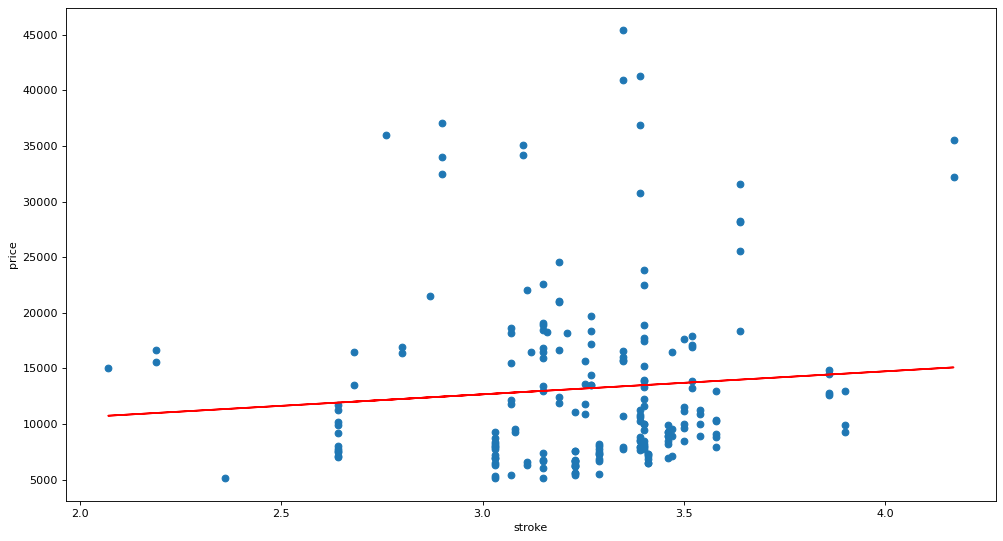

6469.718633642275
[2068.67399201]
0.006768235839059056


,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


In [27]:
# Creating and training a simple regression model of stroke and price
X = data.stroke.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X,y)

# .fit() is calculating the optimal values of the weights b0 and b1, using the existing input and output, 
# x and y, as the arguments. In other words, .fit() fits the model. 

pr = model.predict(X)
plt.figure(figsize=(15,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'red')
plt.xlabel('stroke')
plt.ylabel('price')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))

# The estimated regression function, represented by the red line, has the equation f(x) = b0 + b1 * x. 
# The attributes of model are .intercept_, which represents the coefficient b0, and .coef_, which represents b1.
# .score() - the arguments are the predictor x and response y, and the return value is R^2.

data[["stroke", "price"]].corr()

# corr() is used to find the pairwise correlation of columns in the Pandas Dataframe in Python, excluding NA/null values.

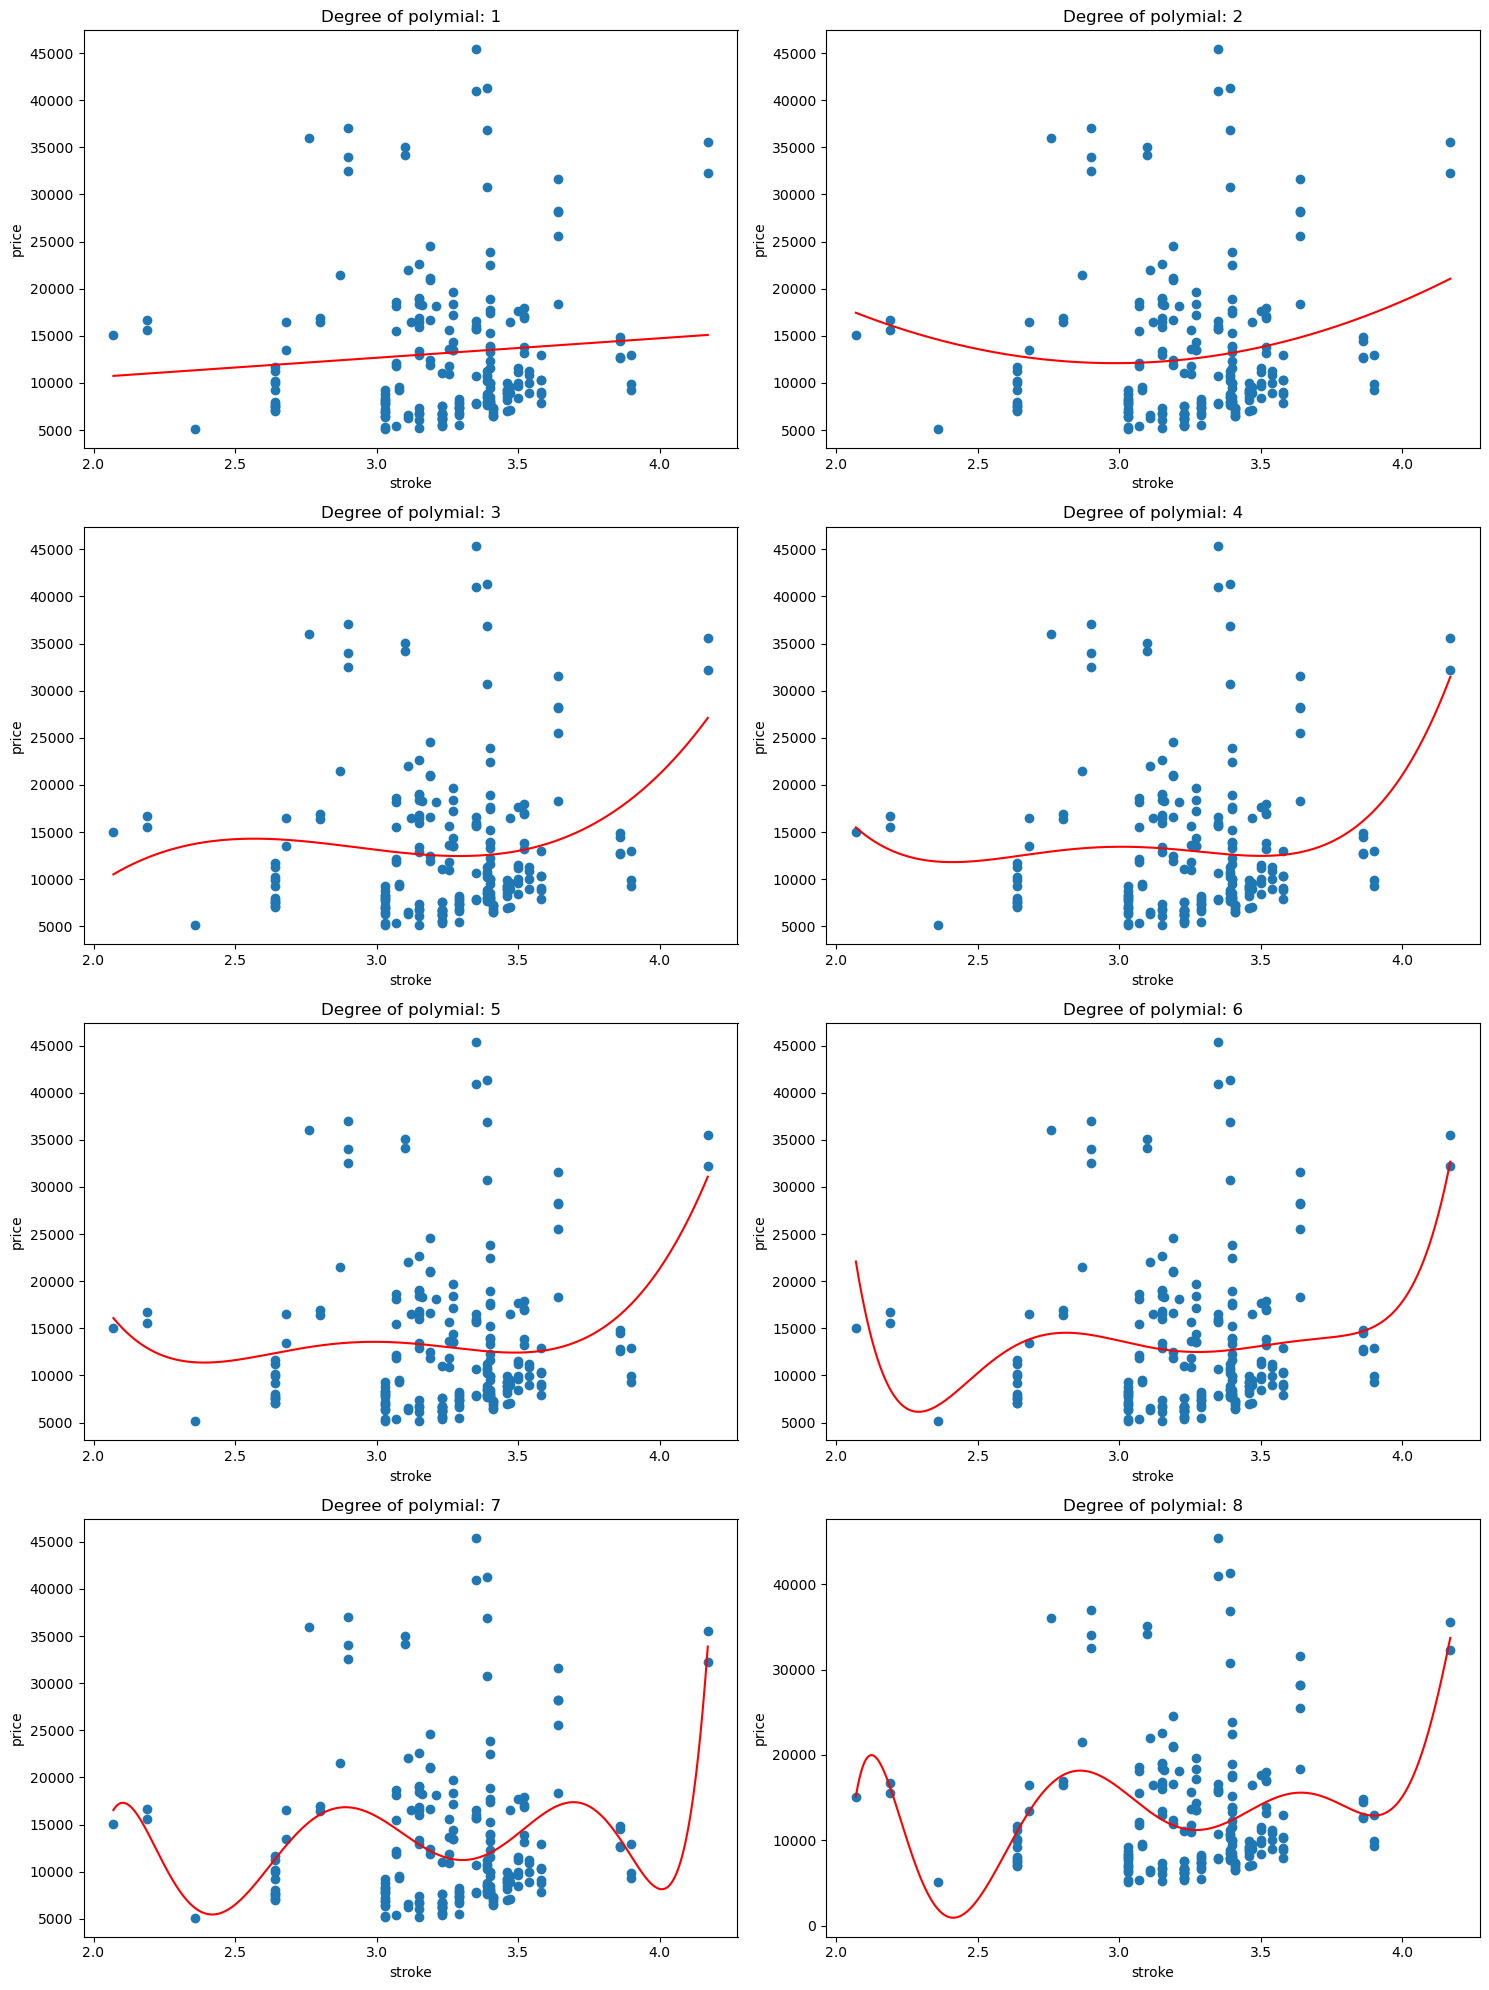

In [28]:
# Creating and ploting higher order polynomial regression models.

# Now I am creating and ploting higher order polynomial regression models from degree 1 to 8.
# As You can see below I decided to use sklearn.pipeline.

# Definition of pipeline class according to scikit-learn is:
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of pipeline must implement fit and transform methods and the final estimator 
# only needs to implement fit.

plt.figure(figsize=(15,20))

errors = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)
    
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    errors.append(mean_squared_error(y, y_pr))

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    plt.xlabel('stroke')
    plt.ylabel('price')
    plt.title("Degree of polymial: {}".format(order))
    
plt.tight_layout()
plt.show()

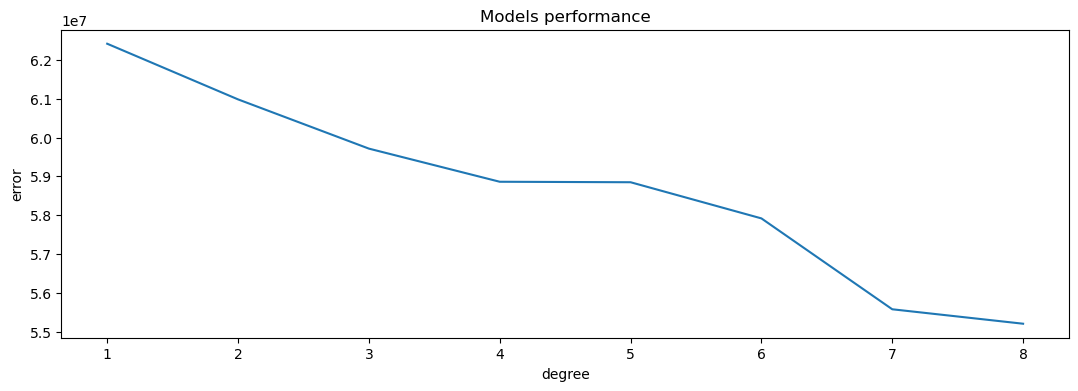

In [29]:
# Graph of the error depending on the degree.
plt.figure(figsize=(13, 4))
plt.plot([1,2,3,4,5,6,7,8], errors)
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

# As can be seen, the error decreases with increasing degree. 
# There is some stagnation between step 4 and 5, but then the error drops again.

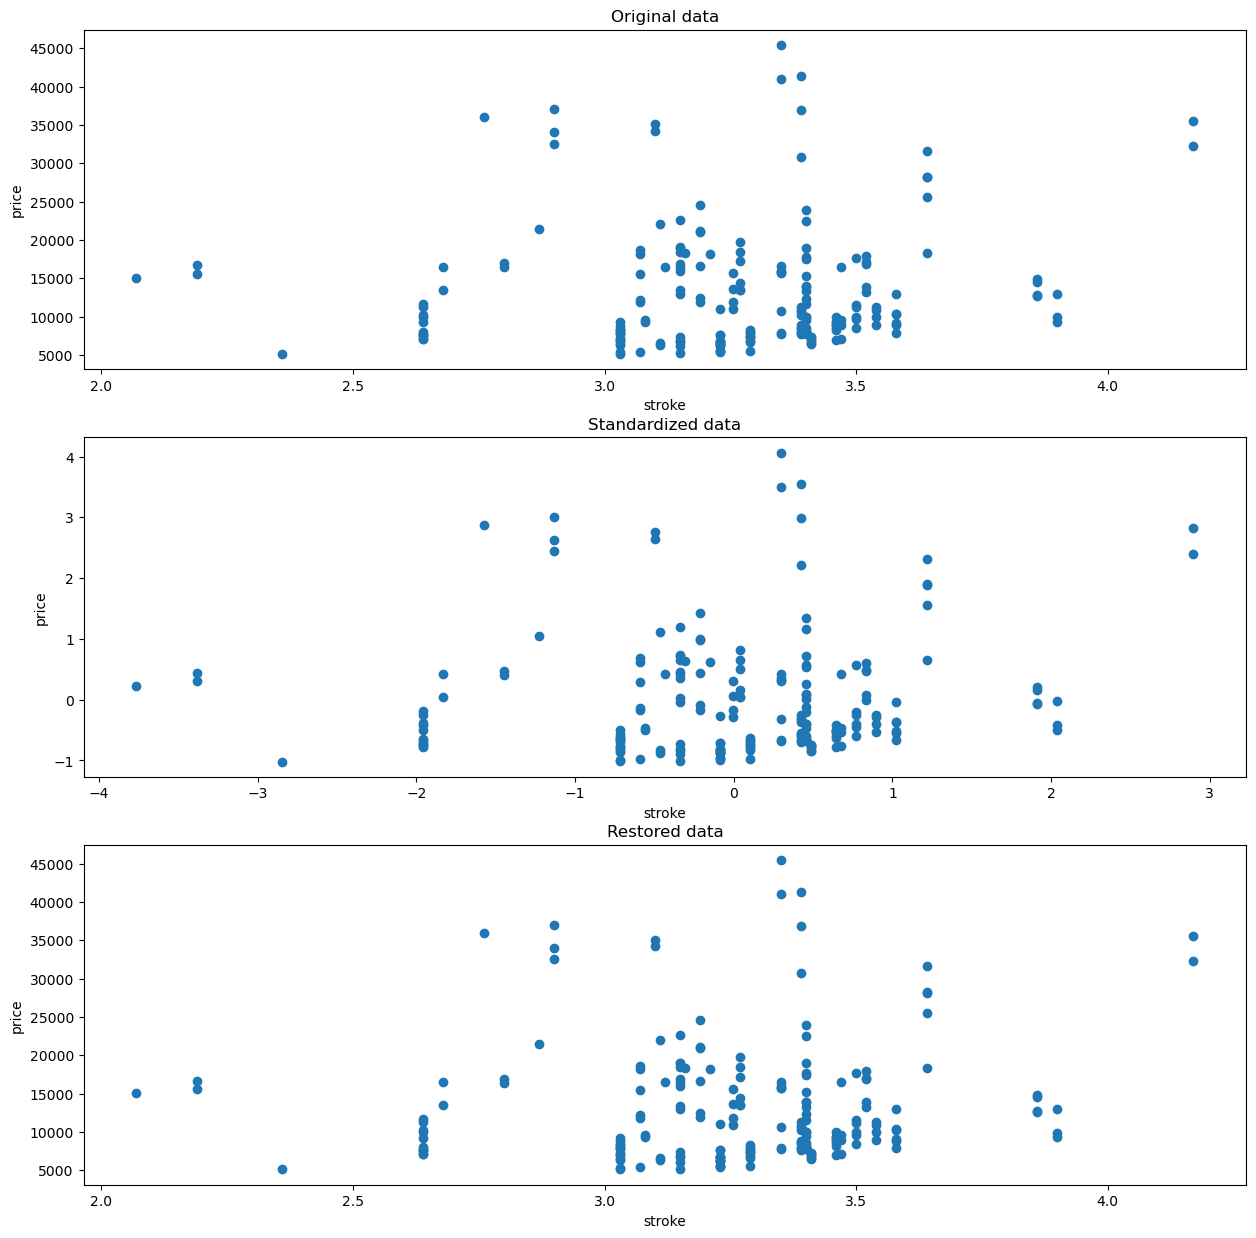

In [30]:
X = data.stroke.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1,1)[:1000]

# Plot size
plt.figure(figsize=(15,15))

# Original Data X, y
plt.subplot(3, 1, 1)
plt.title("Original data")
plt.xlabel("stroke")
plt.ylabel("price")
plt.scatter(X, y)

# Data after standarization 
plt.subplot(3, 1, 2)
plt.title("Standardized data")
plt.xlabel("stroke")
plt.ylabel("price")
standarized_X, mean_x, standard_deviation_x = standardize(X.tolist())
standarized_y, mean_y, standard_deviation_y = standardize(y.tolist())
plt.scatter(standarized_X, standarized_y)

# Data after destandarization
plt.subplot(3, 1, 3)
plt.title("Restored data")
plt.xlabel("stroke")
plt.ylabel("price")
destandarized_X = destandardize(standarized_X, mean_x, standard_deviation_x)
destandarized_y = destandardize(standarized_y, mean_y, standard_deviation_y)
plt.scatter(destandarized_X, destandarized_y);

# Data standardization is the process of converting data to a common format to enable users to process and analyze it.

# As we can see in the middle plot, data has been standardized, so the values on the axes are are easier to read and interpret.
# After the destandardization, the graph's axes looks identical to the one containing the original data (first and third chart).

# Part 5
### Horse power & price

As the horse power goes up, the price goes up: this indicates a positive direct correlation between these two variables. 
Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.
We can examine the correlation between horse power and price and see it's approximately 0.809.

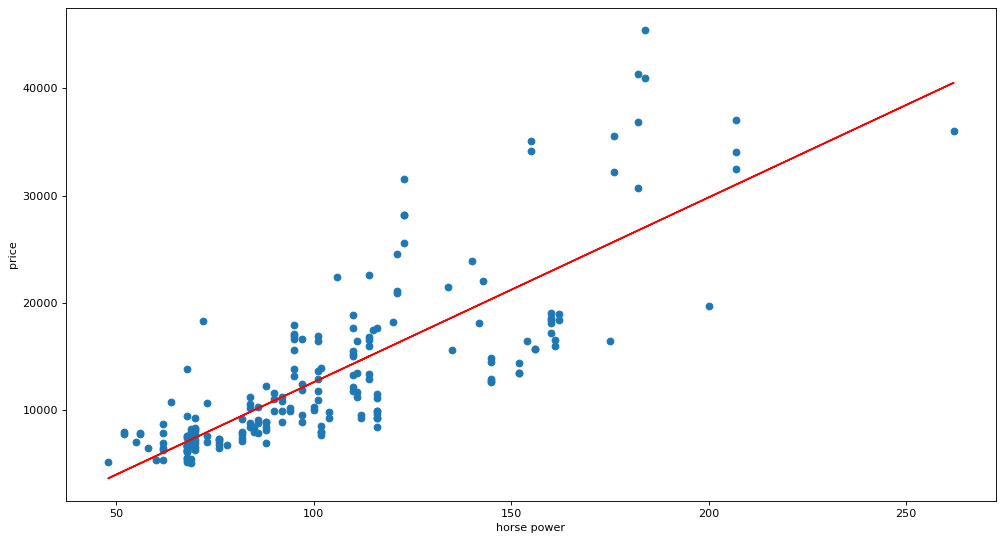

-4597.8519845471565
[172.19020636]
0.6554631732894476


,horsepower,price
horsepower,1.000000,0.809607
price,0.809607,1.000000


In [31]:
# Creating and training a simple regression model of stroke and price
X = data.horsepower.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X,y)

# .fit() is calculating the optimal values of the weights b0 and b1, using the existing input and output, 
# x and y, as the arguments. In other words, .fit() fits the model. 

pr = model.predict(X)
plt.figure(figsize=(15,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'red')
plt.xlabel('horse power')
plt.ylabel('price')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))

# The estimated regression function, represented by the red line, has the equation f(x) = b0 + b1 * x. 
# The attributes of model are .intercept_, which represents the coefficient b0, and .coef_, which represents b1.
# .score() - the arguments are the predictor x and response y, and the return value is R^2.

data[["horsepower", "price"]].corr()

# corr() is used to find the pairwise correlation of columns in the Pandas Dataframe in Python, excluding NA/null values.

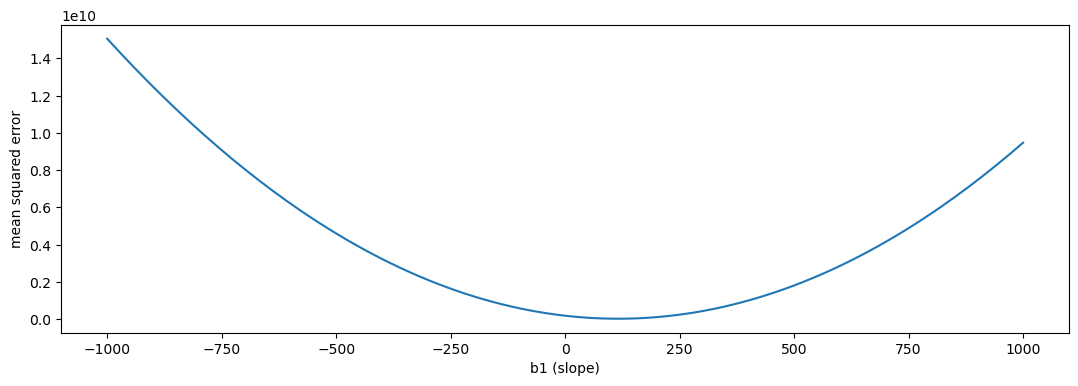

In [32]:
# Data preparation
mse = {}
bs = np.linspace(-1000, 1000, len(X))
for b in bs:
  mse[b] = cost(predict(b, X), y)
X_linspace = np.linspace(0, 6000)
best_b1 = min(mse, key=mse.get)

# Plot size
plt.figure(figsize=(13, 4))

# First Plot
plt.subplot(1, 1, 1)
plt.plot(*zip(*sorted(mse.items())))
plt.xlabel('b1 (slope)')
plt.ylabel('mean squared error');

# Cost function has local minimum (mean squared error is the smallest), when slope value is around 100.

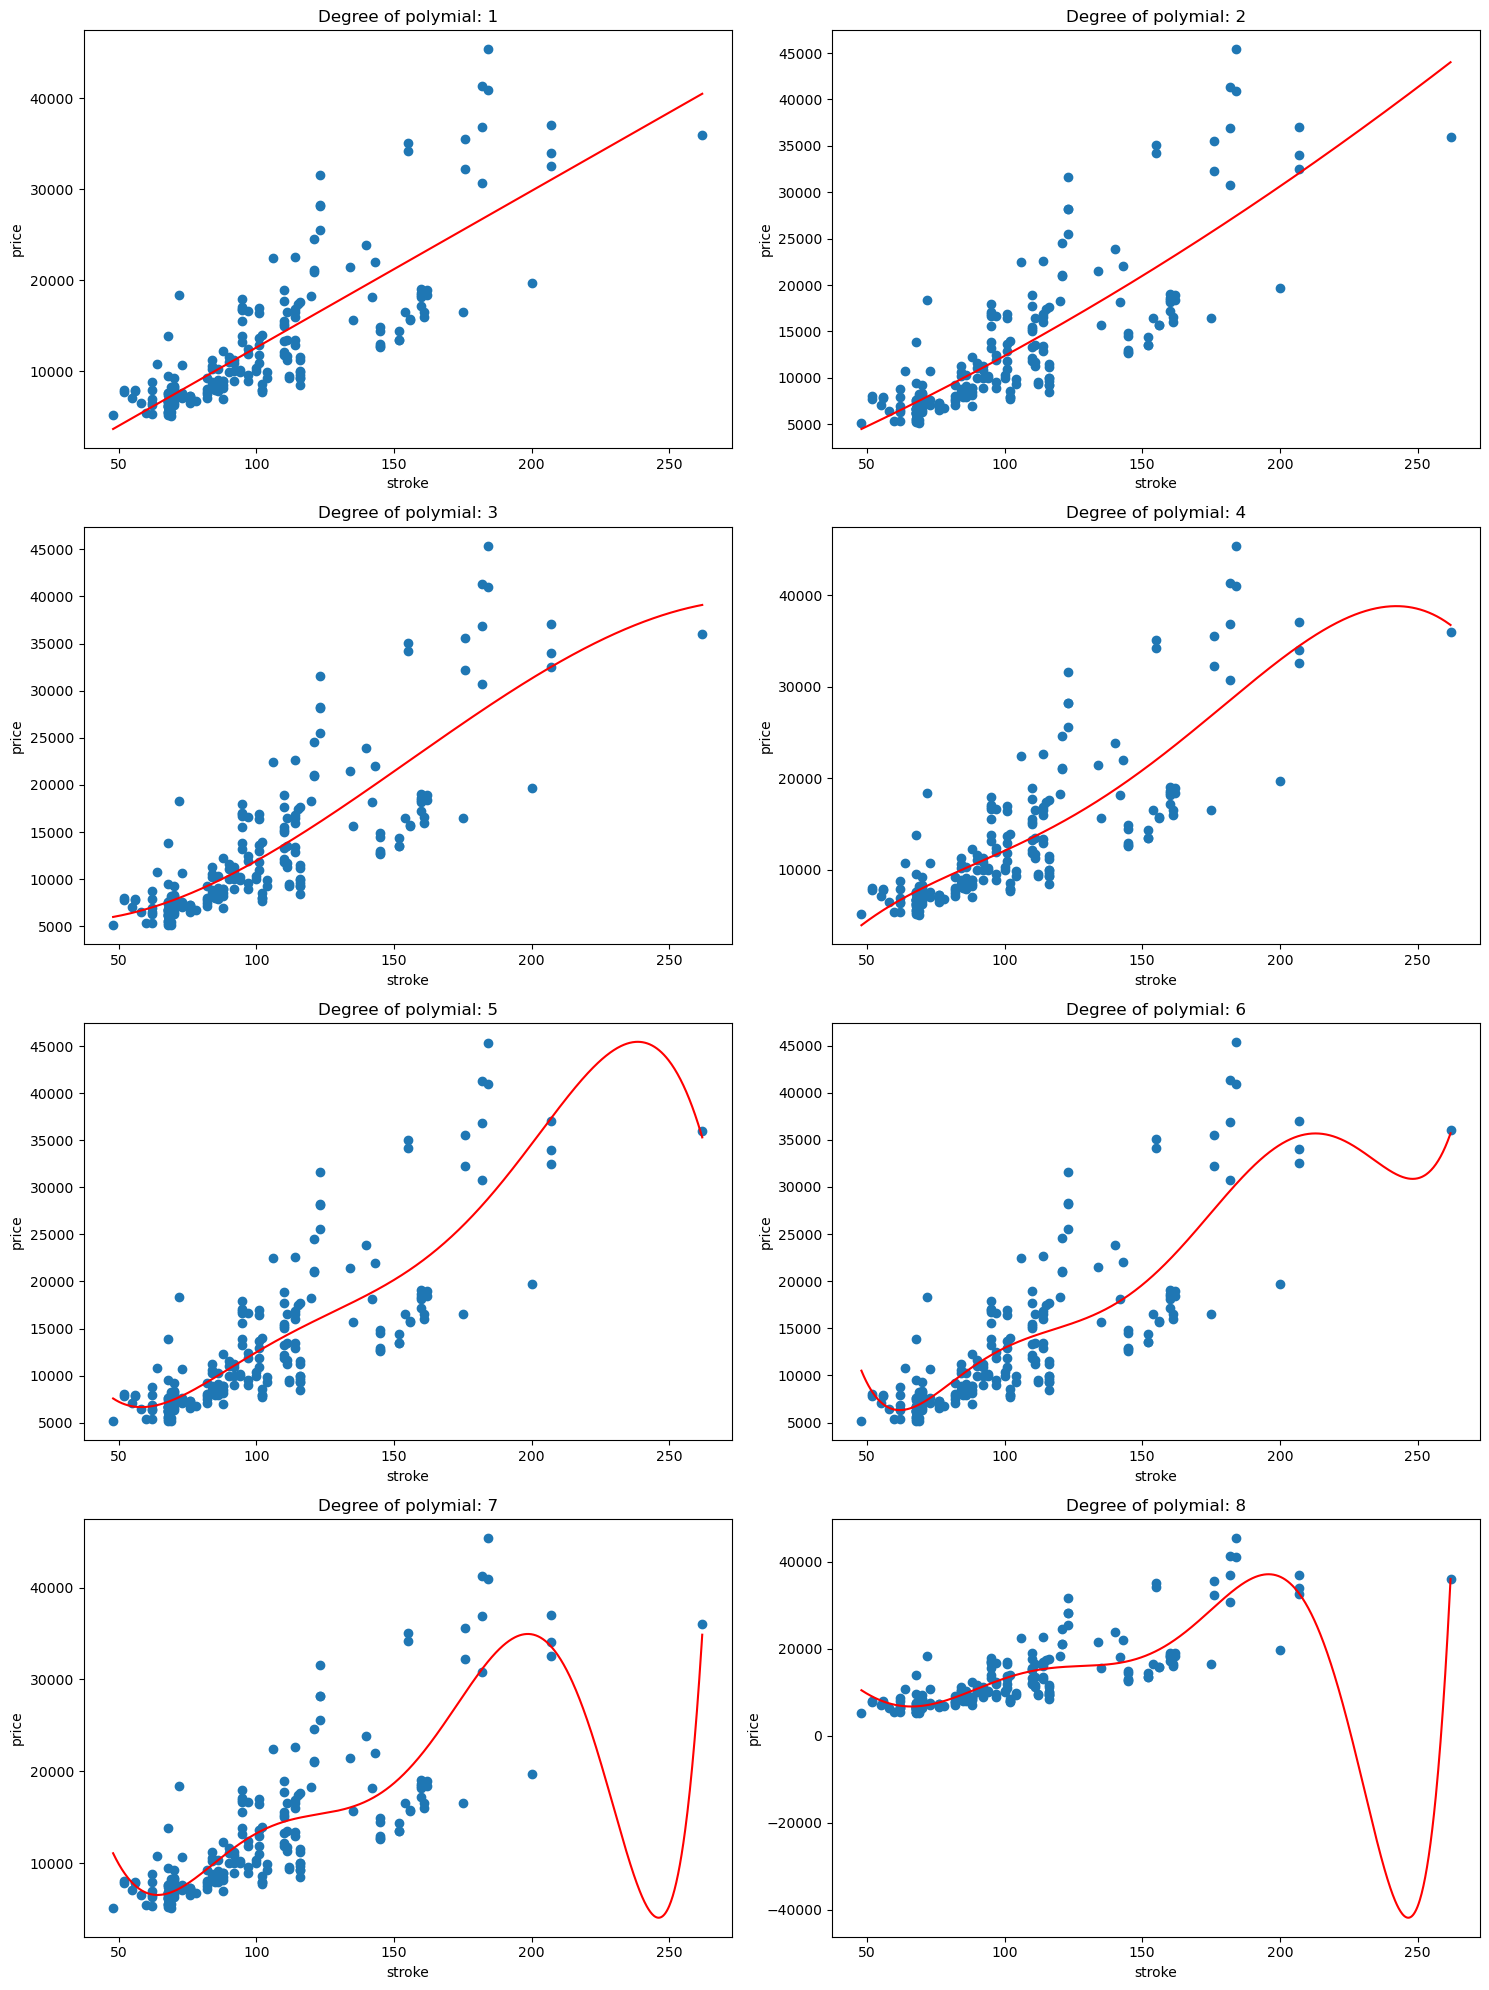

In [33]:
# Creating and ploting higher order polynomial regression models.

# Now I am creating and ploting higher order polynomial regression models from degree 1 to 8.
# As You can see below I decided to use sklearn.pipeline.

# Definition of pipeline class according to scikit-learn is:
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of pipeline must implement fit and transform methods and the final estimator 
# only needs to implement fit.

plt.figure(figsize=(15,20))

errors = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)
    
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    errors.append(mean_squared_error(y, y_pr))

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    plt.xlabel('stroke')
    plt.ylabel('price')
    plt.title("Degree of polymial: {}".format(order))
    
plt.tight_layout()
plt.show()

# For degrees 7 and 8, there is what looks like a Runge phenomenon.

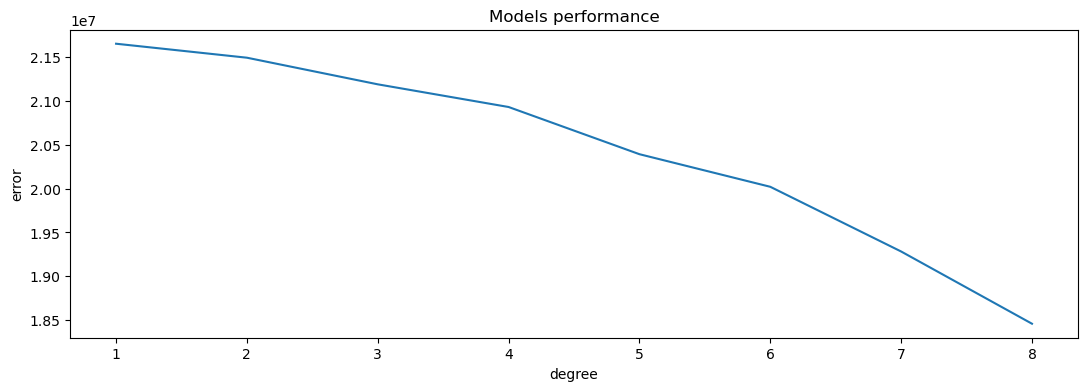

In [34]:
# Graph of the error depending on the degree.
plt.figure(figsize=(13, 4))
plt.plot([1,2,3,4,5,6,7,8], errors)
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

# As can be seen, the error decreases with increasing degree. 

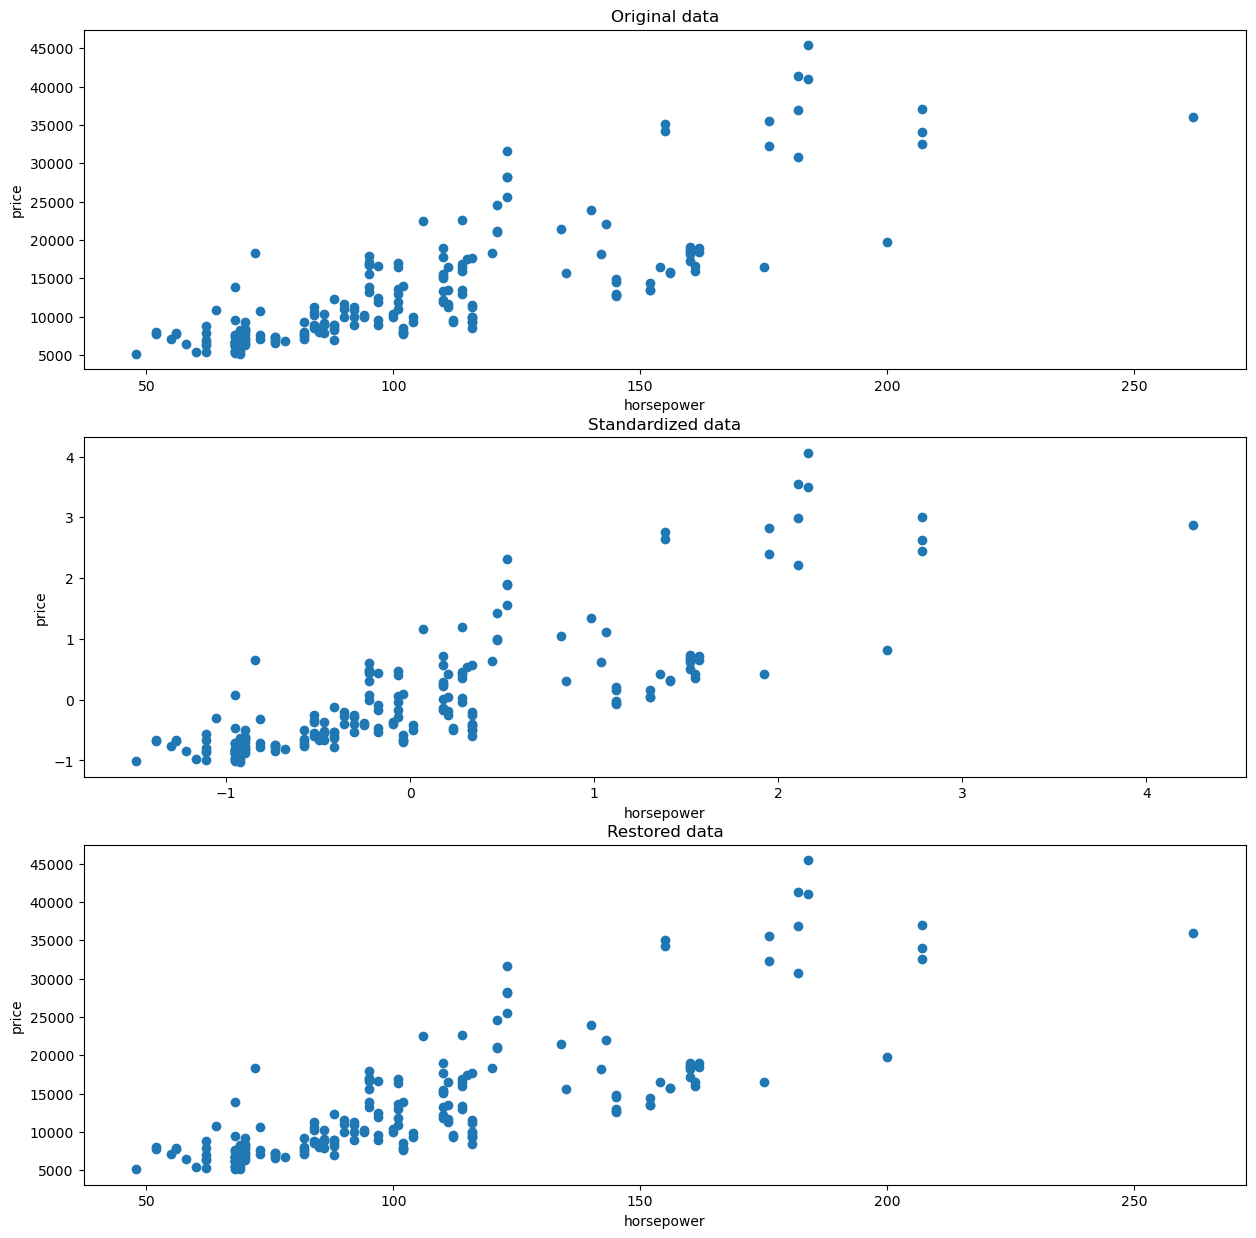

In [35]:
X = data.horsepower.values.reshape(-1,1)[:1000]
y = data.price.values.reshape(-1,1)[:1000]

# Plot size
plt.figure(figsize=(15,15))

# Original Data X, y
plt.subplot(3, 1, 1)
plt.title("Original data")
plt.xlabel("horsepower")
plt.ylabel("price")
plt.scatter(X, y)

# Data after standarization 
plt.subplot(3, 1, 2)
plt.title("Standardized data")
plt.xlabel("horsepower")
plt.ylabel("price")
standarized_X, mean_x, standard_deviation_x = standardize(X.tolist())
standarized_y, mean_y, standard_deviation_y = standardize(y.tolist())
plt.scatter(standarized_X, standarized_y)

# Data after destandarization
plt.subplot(3, 1, 3)
plt.title("Restored data")
plt.xlabel("horsepower")
plt.ylabel("price")
destandarized_X = destandardize(standarized_X, mean_x, standard_deviation_x)
destandarized_y = destandardize(standarized_y, mean_y, standard_deviation_y)
plt.scatter(destandarized_X, destandarized_y);

# Data standardization is the process of converting data to a common format to enable users to process and analyze it.

# As we can see in the middle plot, data has been standardized, so the values on the axes are are easier to read and interpret.
# After the destandardization, the graph's axes looks identical to the one containing the original data (first and third chart).

# Part 6
### Creating model for predicting car price based on Part 1-5

Based on the previous parts, I will try to create a model, which is predicting the price of the car

In [36]:
#b) 
# Here i created first model with only one criteria.

X = data[['engine_size']].values.reshape(-1,1)
y = data.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

# Now I will use more criteria and hope to get a lower MSE. Now it uses variables like:
# engine_size and highway_mpg. I think that with a larger number 
# of properly selected variables I will get a lower MSE than before.

X2 = data[['engine_size', 'highway_mpg']].values.reshape(-1,2)
y2 = data.price.values.reshape(-1)

poly2 = PolynomialFeatures(3, include_bias = False)
X2 = poly2.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=43)
    
model2 = LinearRegression() 
_= model2.fit(X2_train, y2_train) 

y2_pred = model2.predict(X2_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y2_pred, y2_test)))

# As you can see, as expected, I got a lower MSE. The first time it was 14741010.701341 
# and the second time with more data it was 12074338.544509076. It means that we got better 
# model for predicting house prices.

X3 = data[['engine_size', 'highway_mpg', 'horsepower']].values.reshape(-1,3)
y3 = data.price.values.reshape(-1)

poly3 = PolynomialFeatures(3, include_bias = False)
X3 = poly3.fit_transform(X3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=43)
    
model3 = LinearRegression() 
_= model3.fit(X3_train, y3_train) 

y3_pred = model3.predict(X3_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y3_pred, y3_test)))

# I decided to add one more criterion, this time with the wrong correlation coefficient.

X4 = data[['engine_size', 'highway_mpg', 'horsepower', 'stroke']].values.reshape(-1,4)
y4 = data.price.values.reshape(-1)

poly4 = PolynomialFeatures(3, include_bias = False)
X4 = poly4.fit_transform(X4)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=43)
    
model4 = LinearRegression() 
_= model4.fit(X4_train, y4_train) 

y4_pred = model4.predict(X4_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y4_pred, y4_test)))

# Adding another criterion did not reduce the MSE at all, but actually increased it. 
# This is probably because the stroke criterion had a bad correlation.

Mean squared error equals: 14741010.701341
Mean squared error equals: 12074338.544509076
Mean squared error equals: 11238250.419925276
Mean squared error equals: 27044638.40540687


### Conclusion
Below I wanted to post some of my conclusions regarding the prediction of the price of the car, and data analysis in general:

##### Firstly
The things that had the biggest impact on car prices weren't always obvious. In our case, engine size, highway mpg, and horsepower worked well to predict the price of a car. A lot of parameters that seemed appropriate at first glance turned out to have a weak correlation coefficient.

##### Secondly 
Increasing the degree of the polynomial in most cases leads to a better description of our data. This is shown, among others, by the decreasing MSE. However, be careful because too large a polynomial degree can lead to Runge's phenomenon.

##### Thirdly
When creating a model for prediction, attention should be paid to the parameters selected, because poorly selected parameters with a low correlation coefficient may lead to an increase in the MSE instead of its decrease

##### Fourthly
Data standardization helps improve the quality of your data by transforming and standardizing it. Think of it like a uniform for your databases. By taking this step, you are formatting your records in a way that creates consistency across your systems and makes it easy to use

##### Fifthly
The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

The correlation coefficient is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1.